<a href="https://colab.research.google.com/github/AkashKarthikeyan/Bike_Sharing_Prediciton_Capstone_Project_Presentation/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Importing Required Packages and Reading CSV:** 

In [ ]:
pip install scikit-optimize 

     |████████████████████████████████| 102kB 10.8MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import math
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import xgboost as xg

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bsdp_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/Bike Sharing Demand Prediction - SLR/SeoulBikeData.csv', encoding= 'unicode_escape')

In [ ]:
bsdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
bsdp_df.head()

Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
0  01/12/2017                254     0  ...   Winter  No Holiday              Yes
1  01/12/2017                204     1  ...   Winter  No Holiday              Yes
2  01/12/2017                173     2  ...   Winter  No Holiday              Yes
3  01/12/2017                107     3  ...   Winter  No Holiday              Yes
4  01/12/2017                 78     4  ...   Winter  No Holiday              Yes

[5 rows x 14 columns]

# **Exploratory Data Analysis:** 

## **Distribution Plot:** 

### **Checking the distribution:** 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


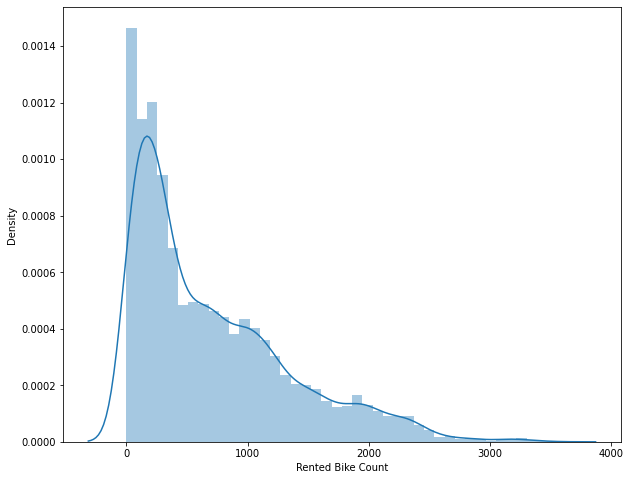

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(bsdp_df['Rented Bike Count'].replace(0,0.01))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


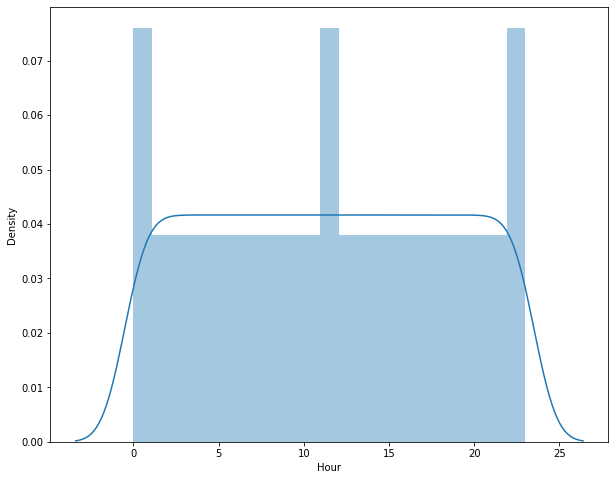

In [ ]:

plt.figure(figsize=(10,8))
sns.distplot(bsdp_df['Hour'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


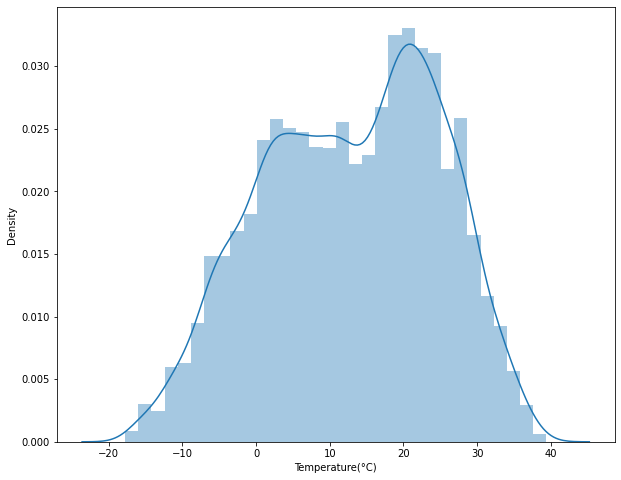

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(bsdp_df['Temperature(°C)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


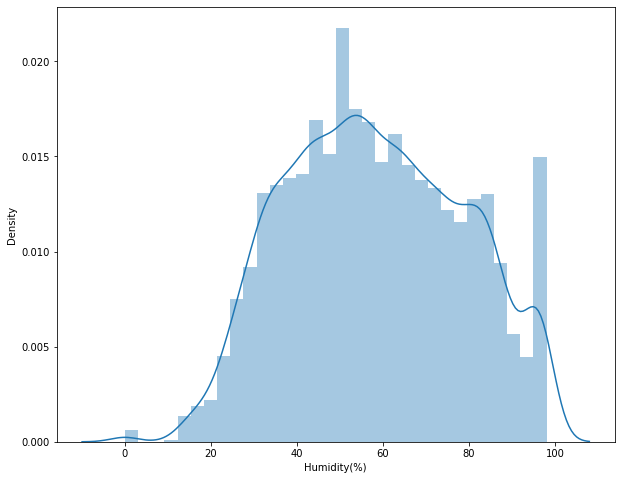

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(bsdp_df['Humidity(%)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


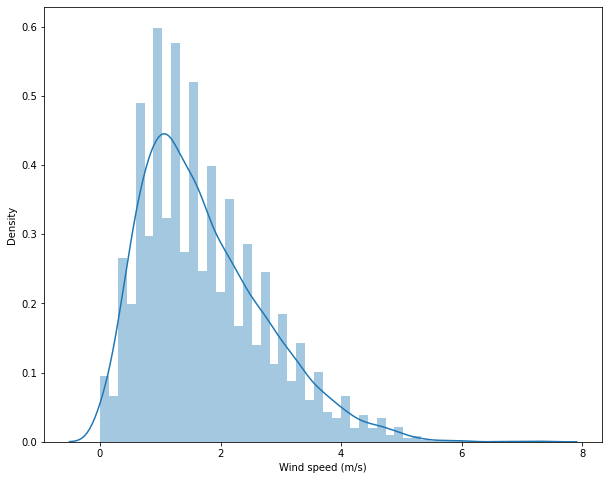

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(bsdp_df['Wind speed (m/s)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


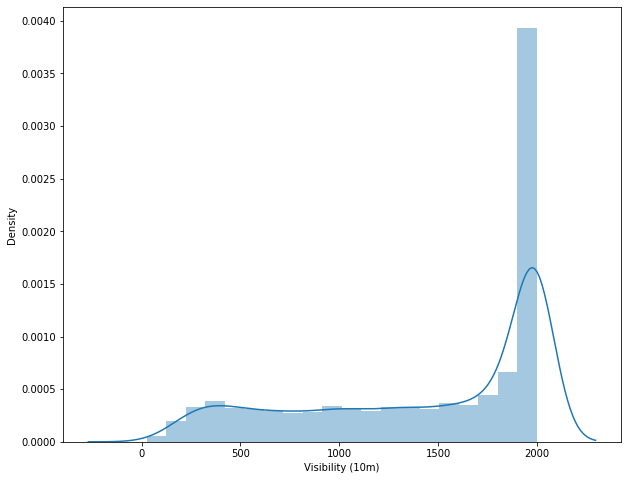

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(bsdp_df['Visibility (10m)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


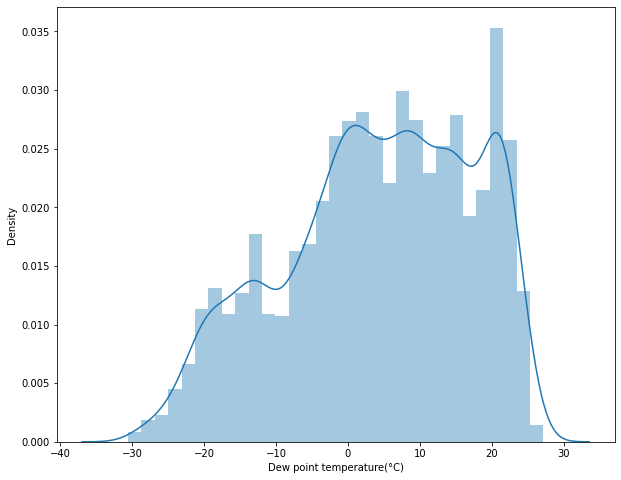

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(bsdp_df['Dew point temperature(°C)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


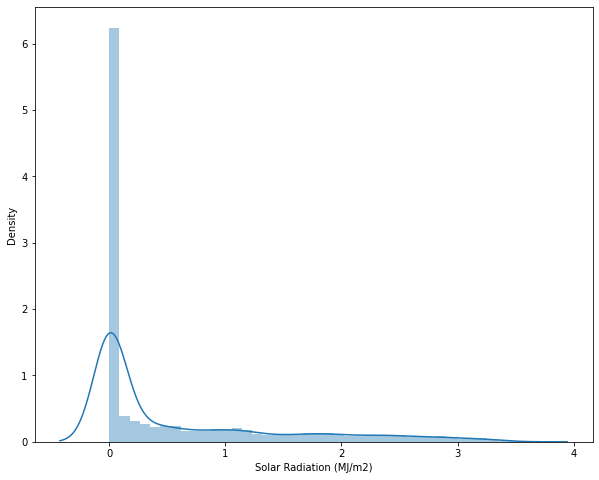

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(bsdp_df['Solar Radiation (MJ/m2)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


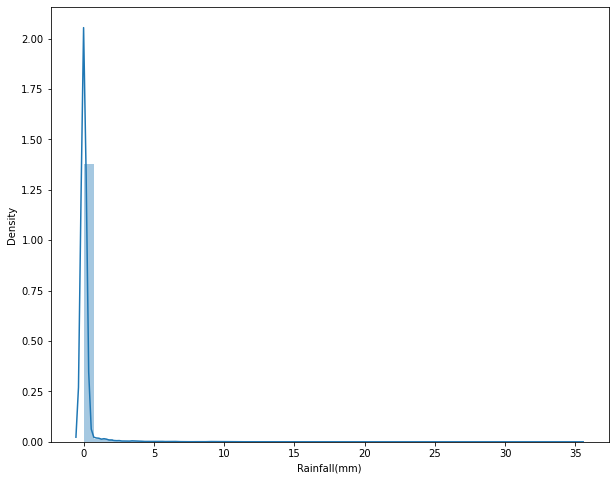

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(bsdp_df['Rainfall(mm)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


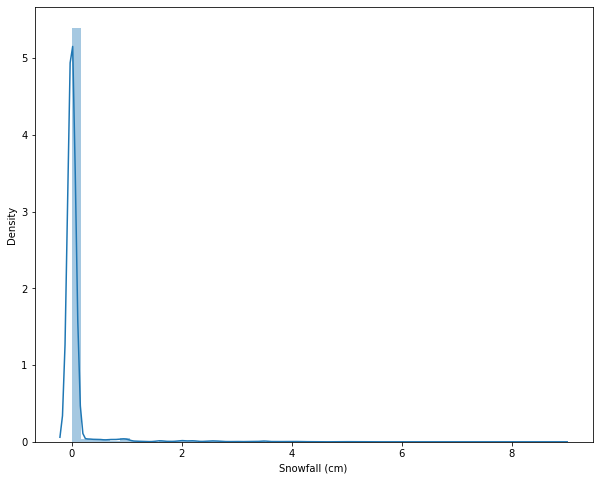

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(bsdp_df['Snowfall (cm)'])

## **Replacing Categorical Variables with dummy variables:** 

### **Get Dummies:** 

Here, the categorical variables are Seasons, Holiday, and Functioning day.

In [ ]:
bsdp_df.head()

Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
0  01/12/2017                254     0  ...   Winter  No Holiday              Yes
1  01/12/2017                204     1  ...   Winter  No Holiday              Yes
2  01/12/2017                173     2  ...   Winter  No Holiday              Yes
3  01/12/2017                107     3  ...   Winter  No Holiday              Yes
4  01/12/2017                 78     4  ...   Winter  No Holiday              Yes

[5 rows x 14 columns]

In [ ]:
bsdp_df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [ ]:
bsdp_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
bsdp_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
# encoders_nums = {
#                  "Seasons":{"Spring":1,"Summer":2,"Autumn":3,"Winter":4}, 'Holiday':{'Holiday':1,'No Holiday':0} , 'Functioning Day':{'Yes':1,"No":0}
#                  }

# bsdp_df = bsdp_df.replace(encoders_nums)

In [ ]:
bsdp_df = pd.get_dummies(data=bsdp_df, columns=['Seasons', 'Holiday','Functioning Day'])

In [ ]:
bsdp_df.head()

Date  Rented Bike Count  ...  Functioning Day_No  Functioning Day_Yes
0  01/12/2017                254  ...                   0                    1
1  01/12/2017                204  ...                   0                    1
2  01/12/2017                173  ...                   0                    1
3  01/12/2017                107  ...                   0                    1
4  01/12/2017                 78  ...                   0                    1

[5 rows x 19 columns]

### **Checking the skew of the Features:** 

In [ ]:
bsdp_df.head()

Date  Rented Bike Count  ...  Functioning Day_No  Functioning Day_Yes
0  01/12/2017                254  ...                   0                    1
1  01/12/2017                204  ...                   0                    1
2  01/12/2017                173  ...                   0                    1
3  01/12/2017                107  ...                   0                    1
4  01/12/2017                 78  ...                   0                    1

[5 rows x 19 columns]

In [ ]:
bsdp_df.skew()

Rented Bike Count             1.153428
Hour                          0.000000
Temperature(°C)              -0.198326
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Solar Radiation (MJ/m2)       1.504040
Rainfall(mm)                 14.533232
Snowfall (cm)                 8.440801
Seasons_Autumn                1.159123
Seasons_Spring                1.142294
Seasons_Summer                1.142294
Seasons_Winter                1.176139
Holiday_Holiday               4.163603
Holiday_No Holiday           -4.163603
Functioning Day_No            5.170969
Functioning Day_Yes          -5.170969
dtype: float64

## **Checking Homoscedasticity:** 

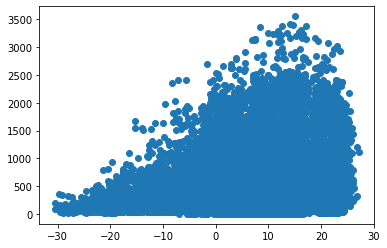

In [ ]:
plt.scatter(bsdp_df['Dew point temperature(°C)'],bsdp_df['Rented Bike Count'])

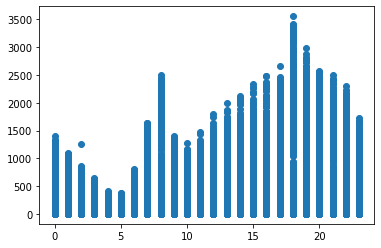

In [ ]:
plt.scatter(bsdp_df['Hour'],bsdp_df['Rented Bike Count'])

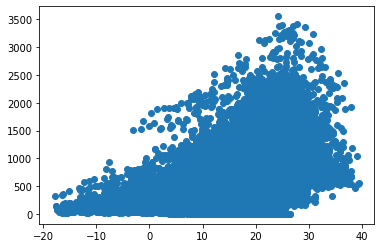

In [ ]:
plt.scatter(bsdp_df['Temperature(°C)'],bsdp_df['Rented Bike Count'])

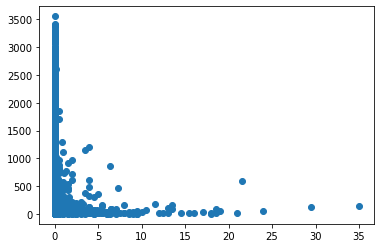

In [ ]:
plt.scatter(bsdp_df['Rainfall(mm)'],bsdp_df['Rented Bike Count'])

## **Checking Correlation:** 

### **Without the dummy variables:** 

In [ ]:
bsdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons_Autumn             8760 non-null   uint8  
 12  Seasons_Spring             8760 non-null   uint8  
 13  Seasons_Summer             8760 non-null   uint8

In [ ]:
bsdp_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No',
       'Functioning Day_Yes'],
      dtype='object')

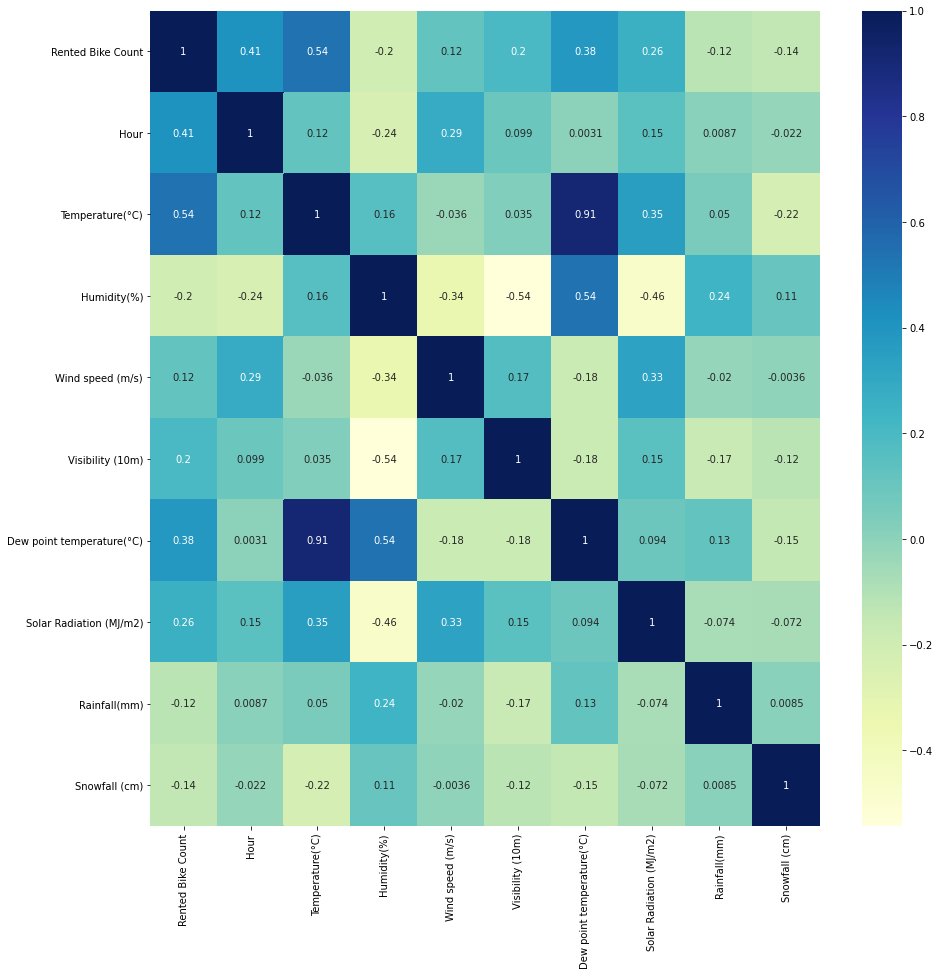

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(bsdp_df.drop(['Date','Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No', 'Functioning Day_Yes'],axis=1).corr(),cmap='YlGnBu',annot=True)

As the temperature constitutes more to the dependent variable, dew point temperature can be dropped as it has high correlation with the temperature.

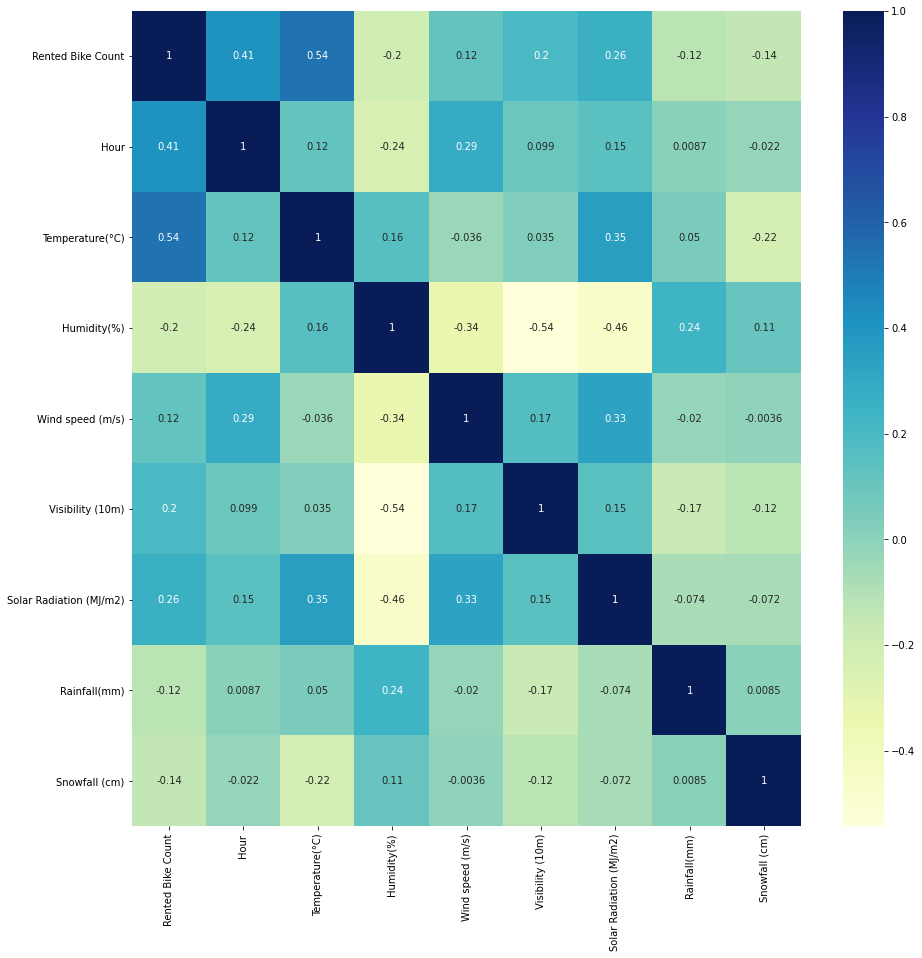

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(bsdp_df.drop(['Date','Dew point temperature(°C)','Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No', 'Functioning Day_Yes'],axis=1).corr(),cmap='YlGnBu',annot=True)

### **With the dummy variables:** 

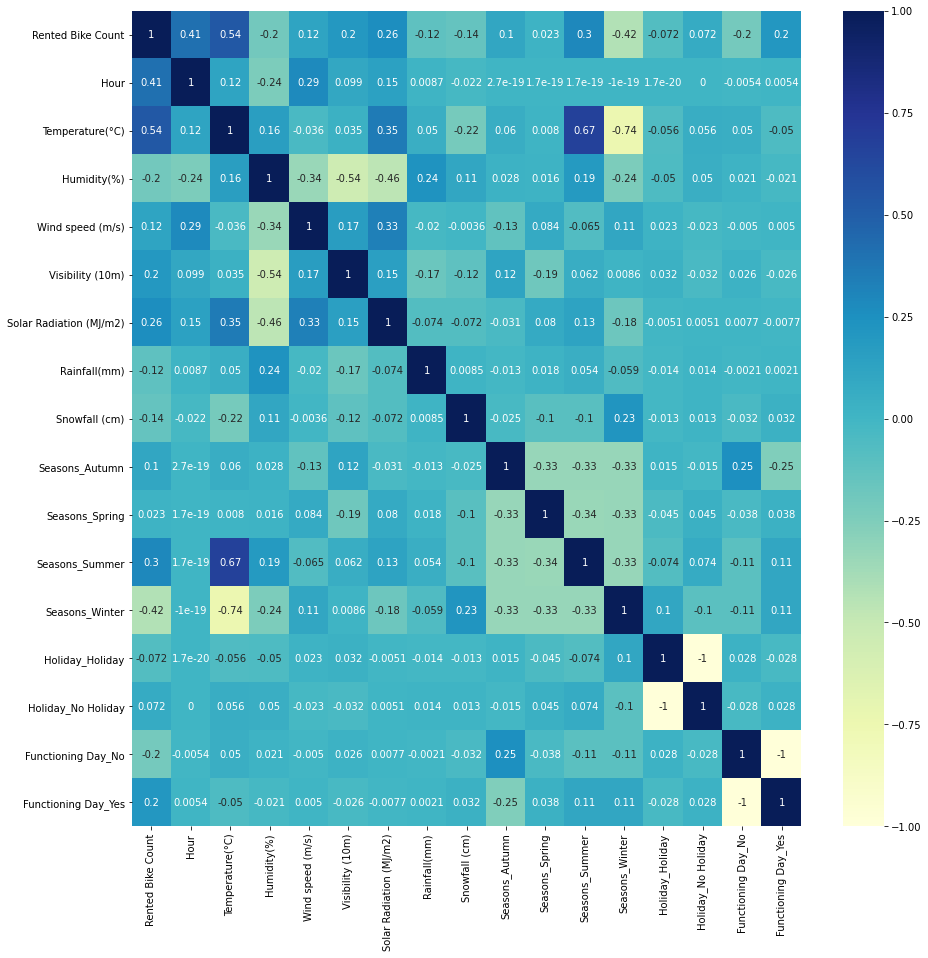

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(bsdp_df.drop(['Date','Dew point temperature(°C)'],axis=1).corr(),cmap='YlGnBu',annot=True)

Therefore, all the variables are non correlating by the above correlation heatmap.

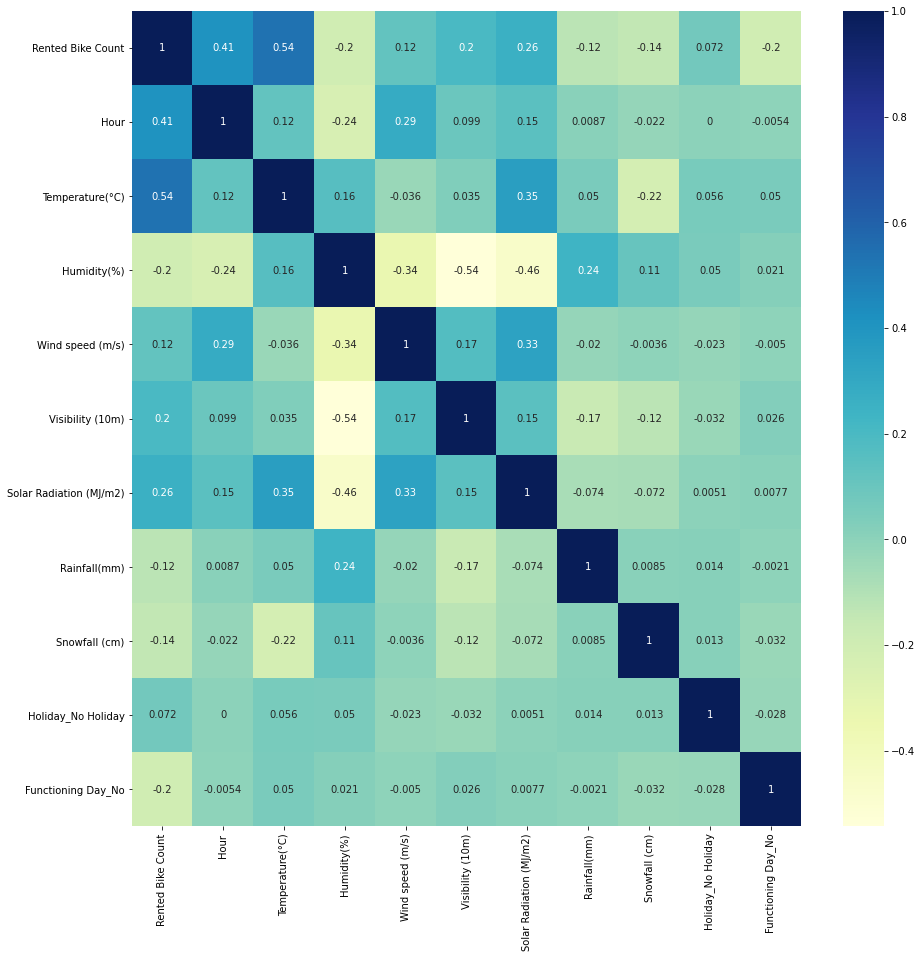

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(bsdp_df.drop(['Date','Dew point temperature(°C)','Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday', 'Functioning Day_Yes'],axis=1).corr(),cmap='YlGnBu',annot=True)

## **Multicollinearity:**

In [ ]:
# the dependent variables set
X = bsdp_df.drop(['Date','Dew point temperature(°C)'],1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data)

                    feature       VIF
0         Rented Bike Count  2.222245
1                      Hour  1.401232
2           Temperature(°C)  5.572928
3               Humidity(%)  2.770640
4          Wind speed (m/s)  1.303757
5          Visibility (10m)  1.683847
6   Solar Radiation (MJ/m2)  1.973608
7              Rainfall(mm)  1.095221
8             Snowfall (cm)  1.114371
9            Seasons_Autumn       inf
10           Seasons_Spring       inf
11           Seasons_Summer       inf
12           Seasons_Winter       inf
13          Holiday_Holiday       inf
14       Holiday_No Holiday       inf
15       Functioning Day_No       inf
16      Functioning Day_Yes       inf


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
# the dependent variables set
X = bsdp_df.drop(['Date','Dew point temperature(°C)','Seasons_Autumn','Rented Bike Count', 'Holiday_Holiday', 'Functioning Day_Yes','Holiday_No Holiday','Temperature(°C)'],1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data)

                    feature       VIF
0                      Hour  3.863762
1               Humidity(%)  4.970480
2          Wind speed (m/s)  4.826903
3          Visibility (10m)  4.943015
4   Solar Radiation (MJ/m2)  1.912428
5              Rainfall(mm)  1.081362
6             Snowfall (cm)  1.128083
7            Seasons_Spring  2.051839
8            Seasons_Summer  2.244963
9            Seasons_Winter  1.988709
10       Functioning Day_No  1.109417


Therefor, there is no multicollinearity after the removal of highly collinear variables.

# **Using OLS from statsmodels to get the model summary:** 

In [ ]:
bsdp_df_copy = bsdp_df.copy()

In [ ]:
bsdp_df_copy.skew()

Rented Bike Count             1.153428
Hour                          0.000000
Temperature(°C)              -0.198326
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Solar Radiation (MJ/m2)       1.504040
Rainfall(mm)                 14.533232
Snowfall (cm)                 8.440801
Seasons_Autumn                1.159123
Seasons_Spring                1.142294
Seasons_Summer                1.142294
Seasons_Winter                1.176139
Holiday_Holiday               4.163603
Holiday_No Holiday           -4.163603
Functioning Day_No            5.170969
Functioning Day_Yes          -5.170969
dtype: float64

In [ ]:
bsdp_df_copy['Snowfall (cm)'] = np.log(bsdp_df_copy['Snowfall (cm)'].replace(0,0.01))
bsdp_df_copy['Solar Radiation (MJ/m2)'] = np.sqrt(bsdp_df_copy['Solar Radiation (MJ/m2)'])
bsdp_df_copy['Wind speed (m/s)'] = np.sqrt(bsdp_df_copy['Wind speed (m/s)'])
bsdp_df_copy['Rented Bike Count'] = np.sqrt(bsdp_df_copy['Rented Bike Count'].replace(0,0.01))
bsdp_df_copy['Rainfall(mm)'] = (1/(bsdp_df_copy['Rainfall(mm)'].replace(0,0.01)))

In [ ]:
bsdp_df_copy.skew()

Rented Bike Count            0.239782
Hour                         0.000000
Temperature(°C)             -0.198326
Humidity(%)                  0.059579
Wind speed (m/s)            -0.005369
Visibility (10m)            -0.701786
Dew point temperature(°C)   -0.367298
Solar Radiation (MJ/m2)      0.807503
Rainfall(mm)                -3.700812
Snowfall (cm)                4.336966
Seasons_Autumn               1.159123
Seasons_Spring               1.142294
Seasons_Summer               1.142294
Seasons_Winter               1.176139
Holiday_Holiday              4.163603
Holiday_No Holiday          -4.163603
Functioning Day_No           5.170969
Functioning Day_Yes         -5.170969
dtype: float64

In [ ]:
bsdp_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   float64
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons_Autumn             8760 non-null   uint8  
 12  Seasons_Spring             8760 non-null   uint8  
 13  Seasons_Summer             8760 non-null   uint8

In [ ]:
# Create the data of independent variables
X = bsdp_df_copy.drop(['Date','Dew point temperature(°C)','Seasons_Autumn','Rented Bike Count', 'Holiday_Holiday', 'Functioning Day_Yes','Holiday_No Holiday','Temperature(°C)','Humidity(%)'],1)

# Create the dependent variable data
y = bsdp_df_copy['Rented Bike Count']

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y_train, X_train).fit() ## sm.OLS(output, input)
predictions = model.predict(X_test)

In [ ]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              8257.
Date:                Fri, 16 Jul 2021   Prob (F-statistic):                        0.00
Time:                        05:21:44   Log-Likelihood:                         -24010.
No. Observations:                7008   AIC:                                  4.804e+04
Df Residuals:                    6998   BIC:                                  4.811e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            14.4146      0.307     46.928      0.000      13.812      15.017
x2             2.5544      0.625      4.090      0.000       1.330       3.779
x3             3.2247      0.307     10.508      0.000       2.623       3.826
x4             5.7129      0.315     18.152      0.000       5.096       6.330
x5            16.4653      0.303     54.411      0.000      15.872      17.059
x6            -2.6504      0.618     -4.286      0.000      -3.863      -1.438
x7            -2.3612      0.254     -9.299      0.000      -2.859      -1.863
x8             2.5683      0.247     10.392      0.000       2.084       3.053
x9           -13.3188      0.269    -49.541      0.000     -13.846     -12.792
x10          -27.3445      0.518    -52.747      0.000     -28.361     -26.328
==============================================================================
Omnibus:                      101.790   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.850
Skew:                           0.286   Prob(JB):                     6.28e-24
Kurtosis:                       3.196   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **Linear Regression Model:** 

## **Naive Model:** 

In [ ]:
# Create the data of independent variables
X = bsdp_df_copy.drop(['Date','Rented Bike Count','Dew point temperature(°C)','Seasons_Autumn', 'Holiday_Holiday', 'Functioning Day_Yes','Holiday_No Holiday','Temperature(°C)','Humidity(%)'],1).values

# Create the dependent variable data
y = bsdp_df_copy['Rented Bike Count'].values

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred))

7.537955534145234

In [ ]:
r2_score(y_test, y_pred)

0.6387867490855245

In [ ]:
# Adjusted R2
def adjusted_r2(n, k, actual, predicted):
  return 1 - (((n-1)/(n-k-1))*(1-r2_score(actual, predicted)))

adjusted_r2(len(y_train),1, y_train, y_train_pred)

0.6431056244410687

In [ ]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))
  
# Training dataset metrics
print_metrics(y_train, y_train_pred)

MSE is 55.0186720305899
RMSE is 7.417457248315618
RMSE is 0.643156558417886
MAE is 5.871408495836067
MAPE is 207.2793391240862


In [ ]:
# Test dataset metrics
print_metrics(y_test, y_test_pred)

MSE is 56.820773634750765
RMSE is 7.537955534145234
RMSE is 0.6387867490855245
MAE is 5.951473944047419
MAPE is 231.57717086456591


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


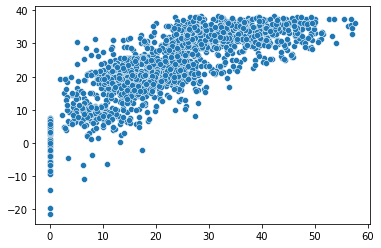

In [ ]:
sns.scatterplot(y_test, y_test_pred)

# **Decision Tree Regressor:** 

## **Fitting into regressor:** 

In [ ]:
# Create the data of independent variables
X = bsdp_df_copy.drop(['Date','Rented Bike Count'],1)

# Create the dependent variable data
y = bsdp_df_copy['Rented Bike Count']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
reg = DecisionTreeRegressor(criterion='mse', max_leaf_nodes=20, random_state=0)
reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=20,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_predicted = reg.predict(X_test)

In [ ]:
y_predicted[:10]

array([13.64340848, 18.94894437, 16.05556048, 16.05556048, 28.23959563,
       25.57330657, 22.42781318, 16.05556048, 34.65535327, 16.05556048])

In [ ]:
y_test[:10]

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
2182    13.784049
3996     7.681146
1652    14.764823
7223    34.957117
776     25.592968
Name: Rented Bike Count, dtype: float64

## **Visualisation:**

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

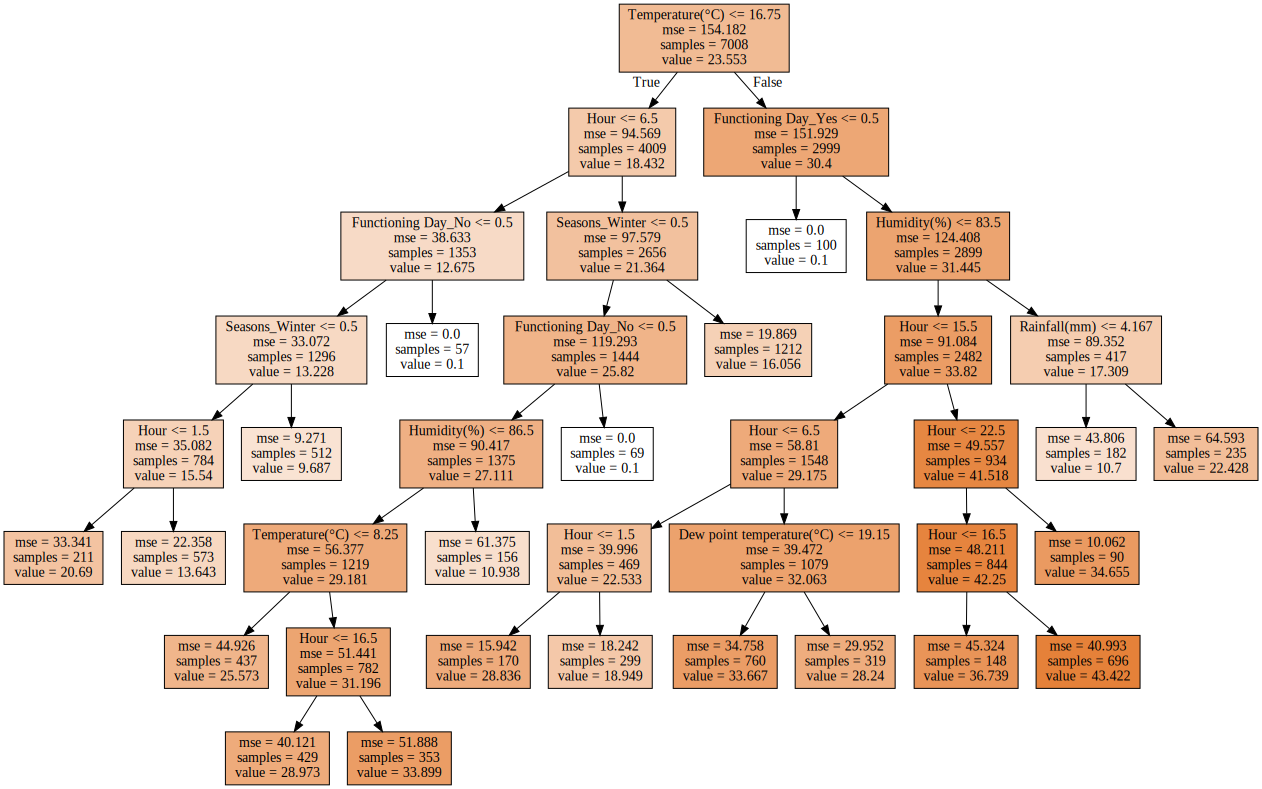

In [ ]:
graph = Source(tree.export_graphviz(reg, out_file=None
   , feature_names=X_train.columns,filled= True))
display(SVG(graph.pipe(format='svg')))

## **Regression Evaluation metrics:**  

In [ ]:
#r2 train
rt2=r2_score(y_train, reg.predict(X_train))
rt2

0.7993147341684843

In [ ]:
#r2 test
r2=r2_score(y_test, y_predicted)
print(r2)


0.7816612299053876


In [ ]:
mse=mean_squared_error(y_test, y_predicted)
print(mse)

34.34585469892762


In [ ]:
rmse=(mean_squared_error(y_test, y_predicted))**0.5
print(rmse)

5.860533653083789


In [ ]:
#mae
mean_absolute_error (y_test,y_predicted)

4.176159040738739

In [ ]:
#Adjusted R2 train
ntr=len(X_train)
ptr=len(X_train.columns)
adj_rt2 = 1-(1-rt2)*(ntr-1)/(ntr-ptr-1)
print(adj_rt2,ntr,ptr)

0.7988266584146737 7008 17


In [ ]:
#Adjusted R2 test
n=len(X_test)
p=len(X_test.columns)
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adj_r2,n,p)

0.7795206537279894 1752 17


In [ ]:
from sklearn.model_selection import cross_val_score

print('Accuracy of Train Data :', cross_val_score(reg, X_train,y_train, cv=10 ))
print('Accuracy of Test Data :', cross_val_score(reg, X_test,y_test, cv=10 ))
predicted = reg.predict(X_test[:2])
print(predicted)

Accuracy of Train Data : [0.78911754 0.79872887 0.81394081 0.79079028 0.78536144 0.77267062
 0.78499244 0.78311696 0.78827842 0.79463764]
Accuracy of Test Data : [0.73891027 0.79072887 0.79327663 0.79414765 0.82455995 0.79257737
 0.77692941 0.81822665 0.82015389 0.75569872]
[13.64340848 18.94894437]


# **Random Forest Regressor:** 

## **GridSearch CV:** 

In [ ]:
# Create the data of independent variables
X = bsdp_df_copy.drop(['Date','Rented Bike Count'],1)

# Create the dependent variable data
y = bsdp_df_copy['Rented Bike Count']

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(7008, 17)

 The shape of test dataset :
(1752, 17)


In [ ]:
# Hyperparameter tuning

regressor = RandomForestRegressor() 
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7, 9, 13, 17]}
rf_regressor = GridSearchCV(regressor, param_grid = grid_values, scoring='neg_mean_squared_error', cv=5)

# Fit the object to train dataset
rf_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
rf_regressor.best_params_

{'max_depth': 17, 'n_estimators': 100}

In [ ]:
rf_model = rf_regressor.best_estimator_
rf_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=17, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_predicted = rf_regressor.predict(X_test)

In [ ]:
y_predicted[:10]

array([15.21606088, 21.62874351, 18.70035653, 13.88709928, 26.3125536 ,
       14.57753649, 22.45623175, 15.46309864, 33.55671075, 19.72019775])

In [ ]:
y_test[:10]

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
2182    13.784049
3996     7.681146
1652    14.764823
7223    34.957117
776     25.592968
Name: Rented Bike Count, dtype: float64

### **Regression Evaluation metrics:**   

In [ ]:
#r2 train
rt2=r2_score(y_train, rf_regressor.predict(X_train))
rt2

0.9825662612076221

In [ ]:
#r2 test
r2=r2_score(y_test, y_predicted)
print(r2)


0.8965708868819245


In [ ]:
mse=mean_squared_error(y_test, y_predicted)
print(mse)

16.269951915791367


In [ ]:
rmse=(mean_squared_error(y_test, y_predicted))**0.5
print(rmse)

4.03360284557012


In [ ]:
#mae
mean_absolute_error (y_test,y_predicted)

2.701152554443879

In [ ]:
#Adjusted R2 train
ntr=len(X_train)
ptr=len(X_train.columns)
adj_rt2 = 1-(1-rt2)*(ntr-1)/(ntr-ptr-1)
print(adj_rt2,ntr,ptr)

0.982523861556768 7008 17


In [ ]:
#Adjusted R2 test
n=len(X_test)
p=len(X_test.columns)
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adj_r2,n,p)

0.8955568759690022 1752 17


In [ ]:
from sklearn.model_selection import cross_val_score

print('Accuracy of Train Data :', cross_val_score(reg, X_train,y_train, cv=10 ))
print('Accuracy of Test Data :', cross_val_score(reg, X_test,y_test, cv=10 ))
predicted = reg.predict(X_test[:2])
print(predicted)

Accuracy of Train Data : [0.78911754 0.79872887 0.81394081 0.79079028 0.78536144 0.77267062
 0.78499244 0.78311696 0.78827842 0.79463764]
Accuracy of Test Data : [0.73891027 0.79072887 0.79327663 0.79414765 0.82455995 0.79257737
 0.77692941 0.81822665 0.82015389 0.75569872]
[13.64340848 18.94894437]


## **RandomSearch CV:** 

In [ ]:
# Create the data of independent variables
X = bsdp_df_copy.drop(['Date','Rented Bike Count'],1)

# Create the dependent variable data
y = bsdp_df_copy['Rented Bike Count']

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(7008, 17)

 The shape of test dataset :
(1752, 17)


In [ ]:
rf = RandomForestRegressor()
param_dict_rf = {'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50], 'min_samples_split': [50, 100, 150], 'n_estimators': [50, 80, 100]}
rf_random = RandomizedSearchCV(rf, param_distributions = param_dict_rf, scoring='neg_mean_squared_error', cv=5)

rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 80}

In [ ]:
y_predicted = rf_random.predict(X_test)

In [ ]:
y_predicted[:10]

array([13.24720865, 21.75837379, 18.73425037, 13.62775809, 27.59778695,
       20.39669322, 25.47852526, 14.63972624, 33.65341574, 17.68668652])

In [ ]:
y_test[:10]

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
2182    13.784049
3996     7.681146
1652    14.764823
7223    34.957117
776     25.592968
Name: Rented Bike Count, dtype: float64

### **Regression Evaluation metrics:**   

In [ ]:
#r2 train
rt2=r2_score(y_train, rf_random.predict(X_train))
rt2

0.8605400306234541

In [ ]:
#r2 test
r2=r2_score(y_test, y_predicted)
print(r2)


0.8371078052774632


In [ ]:
mse=mean_squared_error(y_test, y_predicted)
print(mse)

25.623812248760686


In [ ]:
rmse=(mean_squared_error(y_test, y_predicted))**0.5
print(rmse)

5.061996863764406


In [ ]:
#mae
mean_absolute_error (y_test,y_predicted)

3.640857722651264

In [ ]:
#Adjusted R2 train
ntr=len(X_train)
ptr=len(X_train.columns)
adj_rt2 = 1-(1-rt2)*(ntr-1)/(ntr-ptr-1)
print(adj_rt2,ntr,ptr)

0.8602008575934968 7008 17


In [ ]:
#Adjusted R2 test
n=len(X_test)
p=len(X_test.columns)
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adj_r2,n,p)

0.8355108229762619 1752 17


In [ ]:
from sklearn.model_selection import cross_val_score

print('Accuracy of Train Data :', cross_val_score(reg, X_train,y_train, cv=10 ))
print('Accuracy of Test Data :', cross_val_score(reg, X_test,y_test, cv=10 ))
predicted = reg.predict(X_test[:2])
print(predicted)

Accuracy of Train Data : [0.78911754 0.79872887 0.81394081 0.79079028 0.78536144 0.77267062
 0.78499244 0.78311696 0.78827842 0.79463764]
Accuracy of Test Data : [0.73891027 0.79072887 0.79327663 0.79414765 0.82455995 0.79257737
 0.77692941 0.81822665 0.82015389 0.75569872]
[13.64340848 18.94894437]


## **BayesianSearch CV:**  

In [ ]:
# Create the data of independent variables
X = bsdp_df_copy.drop(['Date','Rented Bike Count'],1)

# Create the dependent variable data
y = bsdp_df_copy['Rented Bike Count']

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(7008, 17)

 The shape of test dataset :
(1752, 17)


In [ ]:
rf = RandomForestRegressor()
param_dict_rf = {'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50], 'min_samples_split': [50, 100, 150], 'n_estimators': [50, 80, 100]}
rf_bayes = BayesSearchCV(estimator=rf, search_spaces = param_dict_rf, cv = 5, verbose=2, scoring='neg_mean_squared_error')

rf_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=46, min_samples_split=100, n_estimators=80 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=46, min_samples_split=100, n_estimators=80, total=   0.7s
[CV] max_depth=4, min_samples_leaf=46, min_samples_split=100, n_estimators=80 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=46, min_samples_split=100, n_estimators=80, total=   0.7s
[CV] max_depth=4, min_samples_leaf=46, min_samples_split=100, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=46, min_samples_split=100, n_estimators=80, total=   0.7s
[CV] max_depth=4, min_samples_leaf=46, min_samples_split=100, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=46, min_samples_split=100, n_estimators=80, total=   0.7s
[CV] max_depth=4, min_samples_leaf=46, min_samples_split=100, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=46, min_samples_split=100, n_estimators=80, total=   0.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=41, min_samples_split=50, n_estimators=80 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=41, min_samples_split=50, n_estimators=80, total=   1.1s
[CV] max_depth=8, min_samples_leaf=41, min_samples_split=50, n_estimators=80 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=41, min_samples_split=50, n_estimators=80, total=   1.1s
[CV] max_depth=8, min_samples_leaf=41, min_samples_split=50, n_estimators=80 
[CV]  max_depth=8, min_samples_leaf=41, min_samples_split=50, n_estimators=80, total=   1.1s
[CV] max_depth=8, min_samples_leaf=41, min_samples_split=50, n_estimators=80 
[CV]  max_depth=8, min_samples_leaf=41, min_samples_split=50, n_estimators=80, total=   1.0s
[CV] max_depth=8, min_samples_leaf=41, min_samples_split=50, n_estimators=80 
[CV]  max_depth=8, min_samples_leaf=41, min_samples_split=50, n_estimators=80, total=   1.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=6, min_samples_leaf=47, min_samples_split=150, n_estimators=80 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=47, min_samples_split=150, n_estimators=80, total=   0.9s
[CV] max_depth=6, min_samples_leaf=47, min_samples_split=150, n_estimators=80 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=47, min_samples_split=150, n_estimators=80, total=   0.9s
[CV] max_depth=6, min_samples_leaf=47, min_samples_split=150, n_estimators=80 
[CV]  max_depth=6, min_samples_leaf=47, min_samples_split=150, n_estimators=80, total=   0.9s
[CV] max_depth=6, min_samples_leaf=47, min_samples_split=150, n_estimators=80 
[CV]  max_depth=6, min_samples_leaf=47, min_samples_split=150, n_estimators=80, total=   0.9s
[CV] max_depth=6, min_samples_leaf=47, min_samples_split=150, n_estimators=80 
[CV]  max_depth=6, min_samples_leaf=47, min_samples_split=150, n_estimators=80, total=   0.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=6, min_samples_leaf=49, min_samples_split=100, n_estimators=80 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=49, min_samples_split=100, n_estimators=80, total=   0.9s
[CV] max_depth=6, min_samples_leaf=49, min_samples_split=100, n_estimators=80 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=49, min_samples_split=100, n_estimators=80, total=   0.9s
[CV] max_depth=6, min_samples_leaf=49, min_samples_split=100, n_estimators=80 
[CV]  max_depth=6, min_samples_leaf=49, min_samples_split=100, n_estimators=80, total=   0.9s
[CV] max_depth=6, min_samples_leaf=49, min_samples_split=100, n_estimators=80 
[CV]  max_depth=6, min_samples_leaf=49, min_samples_split=100, n_estimators=80, total=   0.9s
[CV] max_depth=6, min_samples_leaf=49, min_samples_split=100, n_estimators=80 
[CV]  max_depth=6, min_samples_leaf=49, min_samples_split=100, n_estimators=80, total=   0.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=100 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=100, total=   1.1s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=100, total=   1.1s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=100, total=   1.1s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=100, total=   1.1s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=100, total=   1.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=46, min_samples_split=150, n_estimators=80 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=46, min_samples_split=150, n_estimators=80, total=   0.7s
[CV] max_depth=4, min_samples_leaf=46, min_samples_split=150, n_estimators=80 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=46, min_samples_split=150, n_estimators=80, total=   0.7s
[CV] max_depth=4, min_samples_leaf=46, min_samples_split=150, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=46, min_samples_split=150, n_estimators=80, total=   0.7s
[CV] max_depth=4, min_samples_leaf=46, min_samples_split=150, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=46, min_samples_split=150, n_estimators=80, total=   0.7s
[CV] max_depth=4, min_samples_leaf=46, min_samples_split=150, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=46, min_samples_split=150, n_estimators=80, total=   0.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=6, min_samples_leaf=45, min_samples_split=100, n_estimators=100 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=45, min_samples_split=100, n_estimators=100, total=   1.1s
[CV] max_depth=6, min_samples_leaf=45, min_samples_split=100, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=45, min_samples_split=100, n_estimators=100, total=   1.1s
[CV] max_depth=6, min_samples_leaf=45, min_samples_split=100, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=45, min_samples_split=100, n_estimators=100, total=   1.1s
[CV] max_depth=6, min_samples_leaf=45, min_samples_split=100, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=45, min_samples_split=100, n_estimators=100, total=   1.1s
[CV] max_depth=6, min_samples_leaf=45, min_samples_split=100, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=45, min_samples_split=100, n_estimators=100, total=   1.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=44, min_samples_split=50, n_estimators=80 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=44, min_samples_split=50, n_estimators=80, total=   0.7s
[CV] max_depth=4, min_samples_leaf=44, min_samples_split=50, n_estimators=80 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=44, min_samples_split=50, n_estimators=80, total=   0.7s
[CV] max_depth=4, min_samples_leaf=44, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=44, min_samples_split=50, n_estimators=80, total=   0.7s
[CV] max_depth=4, min_samples_leaf=44, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=44, min_samples_split=50, n_estimators=80, total=   0.7s
[CV] max_depth=4, min_samples_leaf=44, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=44, min_samples_split=50, n_estimators=80, total=   0.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=6, min_samples_leaf=48, min_samples_split=100, n_estimators=80 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=48, min_samples_split=100, n_estimators=80, total=   0.9s
[CV] max_depth=6, min_samples_leaf=48, min_samples_split=100, n_estimators=80 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=48, min_samples_split=100, n_estimators=80, total=   0.9s
[CV] max_depth=6, min_samples_leaf=48, min_samples_split=100, n_estimators=80 
[CV]  max_depth=6, min_samples_leaf=48, min_samples_split=100, n_estimators=80, total=   0.9s
[CV] max_depth=6, min_samples_leaf=48, min_samples_split=100, n_estimators=80 
[CV]  max_depth=6, min_samples_leaf=48, min_samples_split=100, n_estimators=80, total=   0.9s
[CV] max_depth=6, min_samples_leaf=48, min_samples_split=100, n_estimators=80 
[CV]  max_depth=6, min_samples_leaf=48, min_samples_split=100, n_estimators=80, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=43, min_samples_split=150, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=43, min_samples_split=150, n_estimators=50, total=   0.7s
[CV] max_depth=8, min_samples_leaf=43, min_samples_split=150, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=43, min_samples_split=150, n_estimators=50, total=   0.6s
[CV] max_depth=8, min_samples_leaf=43, min_samples_split=150, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=43, min_samples_split=150, n_estimators=50, total=   0.6s
[CV] max_depth=8, min_samples_leaf=43, min_samples_split=150, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=43, min_samples_split=150, n_estimators=50, total=   0.6s
[CV] max_depth=8, min_samples_leaf=43, min_samples_split=150, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=43, min_samples_split=150, n_estimators=50, total=   0.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.1s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.1s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.1s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.1s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=42, min_samples_split=50, n_estimators=80 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=42, min_samples_split=50, n_estimators=80, total=   1.1s
[CV] max_depth=8, min_samples_leaf=42, min_samples_split=50, n_estimators=80 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=42, min_samples_split=50, n_estimators=80, total=   1.1s
[CV] max_depth=8, min_samples_leaf=42, min_samples_split=50, n_estimators=80 
[CV]  max_depth=8, min_samples_leaf=42, min_samples_split=50, n_estimators=80, total=   1.0s
[CV] max_depth=8, min_samples_leaf=42, min_samples_split=50, n_estimators=80 
[CV]  max_depth=8, min_samples_leaf=42, min_samples_split=50, n_estimators=80, total=   1.1s
[CV] max_depth=8, min_samples_leaf=42, min_samples_split=50, n_estimators=80 
[CV]  max_depth=8, min_samples_leaf=42, min_samples_split=50, n_estimators=80, total=   1.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.5s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.7s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.7s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.7s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.7s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.4s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.7s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.7s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.7s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.7s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.7s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.7s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.7s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.7s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.7s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.7s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.3s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.7s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.7s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.7s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.7s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.3s finished


BayesSearchCV(cv=5, error_score='raise',
              estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                              criterion='mse', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                    

In [ ]:
rf_bayes.best_params_

In [ ]:
y_predicted = rf_bayes.predict(X_test)

In [ ]:
y_predicted[:10]

In [ ]:
y_test[:10]

### **Regression Evaluation metrics:**   

In [ ]:
#r2 train
rt2=r2_score(y_train, rf_bayes.predict(X_train))
rt2

In [ ]:
#r2 test
r2=r2_score(y_test, y_predicted)
print(r2)


In [ ]:
mse=mean_squared_error(y_test, y_predicted)
print(mse)

In [ ]:
rmse=(mean_squared_error(y_test, y_predicted))**0.5
print(rmse)

In [ ]:
#mae
mean_absolute_error (y_test,y_predicted)

In [ ]:
#Adjusted R2 train
ntr=len(X_train)
ptr=len(X_train.columns)
adj_rt2 = 1-(1-rt2)*(ntr-1)/(ntr-ptr-1)
print(adj_rt2,ntr,ptr)

In [ ]:
#Adjusted R2 test
n=len(X_test)
p=len(X_test.columns)
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adj_r2,n,p)

In [ ]:
from sklearn.model_selection import cross_val_score

print('Accuracy of Train Data :', cross_val_score(reg, X_train,y_train, cv=10 ))
print('Accuracy of Test Data :', cross_val_score(reg, X_test,y_test, cv=10 ))
predicted = reg.predict(X_test[:2])
print(predicted)

# **Gradient Boosting Regressor:** 

## **GridSearch CV:** 

In [ ]:
# Create the data of independent variables
X = bsdp_df_copy.drop(['Date','Rented Bike Count'],1)

# Create the dependent variable data
y = bsdp_df_copy['Rented Bike Count']

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

In [134]:
# Hyperparameter tuning

regressor = GradientBoostingRegressor() 
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7, 9, 13, 17]}
gbr_regressor = GridSearchCV(regressor, param_grid = grid_values, scoring='neg_mean_squared_error', cv=5)

# Fit the object to train dataset
gbr_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [135]:
gbr_regressor.best_params_

{'max_depth': 7, 'n_estimators': 100}

In [136]:
y_predicted = gbr_regressor.predict(X_test)

In [137]:
y_predicted[:10]

array([14.47469143, 22.00220552, 17.63630442, 14.62637951, 26.11829645,
       15.77112906, 16.00873676, 16.16957199, 34.30376961, 21.50187855])

In [138]:
y_test[:10]

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
2182    13.784049
3996     7.681146
1652    14.764823
7223    34.957117
776     25.592968
Name: Rented Bike Count, dtype: float64

### **Regression Evaluation metrics:**  

In [139]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [140]:
#r2 train
rt2=r2_score(y_train, gbr_regressor.predict(X_train))
rt2

0.9595107364151515

In [141]:
#r2 test
r2=r2_score(y_test, y_predicted)
print(r2)


0.9022474446206468


In [142]:
mse=mean_squared_error(y_test, y_predicted)
print(mse)

15.376999064587963


In [143]:
rmse=(mean_squared_error(y_test, y_predicted))**0.5
print(rmse)

3.9213516884599833


In [144]:
#mae
mean_absolute_error (y_test,y_predicted)

2.6733817656842307

In [145]:
#Adjusted R2 train
ntr=len(X_train)
ptr=len(X_train.columns)
adj_rt2 = 1-(1-rt2)*(ntr-1)/(ntr-ptr-1)
print(adj_rt2,ntr,ptr)

0.9594122646725274 7008 17


In [146]:
#Adjusted R2 test
n=len(X_test)
p=len(X_test.columns)
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adj_r2,n,p)

0.9012890862345747 1752 17


In [147]:
from sklearn.model_selection import cross_val_score

print('Accuracy of Train Data :', cross_val_score(reg, X_train,y_train, cv=10 ))
print('Accuracy of Test Data :', cross_val_score(reg, X_test,y_test, cv=10 ))
predicted = reg.predict(X_test[:2])
print(predicted)

Accuracy of Train Data : [0.78911754 0.79872887 0.81394081 0.79079028 0.78536144 0.77267062
 0.78499244 0.78311696 0.78827842 0.79463764]
Accuracy of Test Data : [0.73891027 0.79072887 0.79327663 0.79414765 0.82455995 0.79257737
 0.77692941 0.81822665 0.82015389 0.75569872]
[13.64340848 18.94894437]


## **RandomSearch CV:** 

In [148]:
# Create the data of independent variables
X = bsdp_df_copy.drop(['Date','Rented Bike Count'],1)

# Create the dependent variable data
y = bsdp_df_copy['Rented Bike Count']

In [149]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [150]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(7008, 17)

 The shape of test dataset :
(1752, 17)


In [151]:
regressor = GradientBoostingRegressor() 
params = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7, 9, 13, 17]}
gbr_regressor = RandomizedSearchCV(regressor, param_distributions = params, scoring='neg_mean_squared_error', cv=5)

# Fit the object to train dataset
gbr_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [153]:
gbr_regressor.best_params_

{'max_depth': 7, 'n_estimators': 100}

In [154]:
gbm_model = gbr_regressor.best_estimator_

In [155]:
y_predicted = gbr_regressor.predict(X_test)

In [156]:
y_predicted[:10]

array([14.47469143, 22.00220552, 17.63630442, 14.62637951, 26.11870146,
       15.77112906, 17.06793138, 16.16957199, 34.30376961, 21.50187855])

In [157]:
y_test[:10]

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
2182    13.784049
3996     7.681146
1652    14.764823
7223    34.957117
776     25.592968
Name: Rented Bike Count, dtype: float64

### **Regression Evaluation metrics:**   

In [158]:
#r2 train
rt2=r2_score(y_train, rf_regressor.predict(X_train))
rt2

0.9825662612076221

In [159]:
#r2 test
r2=r2_score(y_test, y_predicted)
print(r2)


0.9021490321709575


In [160]:
mse=mean_squared_error(y_test, y_predicted)
print(mse)

15.392479868552035


In [161]:
rmse=(mean_squared_error(y_test, y_predicted))**0.5
print(rmse)

3.923325103601795


In [162]:
#mae
mean_absolute_error (y_test,y_predicted)

2.6722178838539468

In [163]:
#Adjusted R2 train
ntr=len(X_train)
ptr=len(X_train.columns)
adj_rt2 = 1-(1-rt2)*(ntr-1)/(ntr-ptr-1)
print(adj_rt2,ntr,ptr)

0.982523861556768 7008 17


In [164]:
#Adjusted R2 test
n=len(X_test)
p=len(X_test.columns)
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adj_r2,n,p)

0.9011897089569474 1752 17


In [165]:
from sklearn.model_selection import cross_val_score

print('Accuracy of Train Data :', cross_val_score(reg, X_train,y_train, cv=10 ))
print('Accuracy of Test Data :', cross_val_score(reg, X_test,y_test, cv=10 ))
predicted = reg.predict(X_test[:2])
print(predicted)

Accuracy of Train Data : [0.78911754 0.79872887 0.81394081 0.79079028 0.78536144 0.77267062
 0.78499244 0.78311696 0.78827842 0.79463764]
Accuracy of Test Data : [0.73891027 0.79072887 0.79327663 0.79414765 0.82455995 0.79257737
 0.77692941 0.81822665 0.82015389 0.75569872]
[13.64340848 18.94894437]


## **BayesSearch CV:** 

In [166]:
# Create the data of independent variables
X = bsdp_df_copy.drop(['Date','Rented Bike Count'],1)

# Create the dependent variable data
y = bsdp_df_copy['Rented Bike Count']

In [167]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [168]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(7008, 17)

 The shape of test dataset :
(1752, 17)


In [169]:
regressor = GradientBoostingRegressor() 
params = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7, 9, 13, 17]}
gbr_regressor = BayesSearchCV(estimator=regressor, search_spaces = params, cv = 5, verbose=2, scoring='neg_mean_squared_error')

# Fit the object to train dataset
gbr_regressor.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=80 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=7, n_estimators=80, total=   1.6s
[CV] max_depth=7, n_estimators=80 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ..................... max_depth=7, n_estimators=80, total=   1.6s
[CV] max_depth=7, n_estimators=80 ....................................
[CV] ..................... max_depth=7, n_estimators=80, total=   1.6s
[CV] max_depth=7, n_estimators=80 ....................................
[CV] ..................... max_depth=7, n_estimators=80, total=   1.6s
[CV] max_depth=7, n_estimators=80 ....................................
[CV] ..................... max_depth=7, n_estimators=80, total=   1.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=80 ....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=7, n_estimators=80, total=   1.6s
[CV] max_depth=7, n_estimators=80 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ..................... max_depth=7, n_estimators=80, total=   1.6s
[CV] max_depth=7, n_estimators=80 ....................................
[CV] ..................... max_depth=7, n_estimators=80, total=   1.6s
[CV] max_depth=7, n_estimators=80 ....................................
[CV] ..................... max_depth=7, n_estimators=80, total=   1.6s
[CV] max_depth=7, n_estimators=80 ....................................
[CV] ..................... max_depth=7, n_estimators=80, total=   1.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=80 ....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=7, n_estimators=80, total=   1.6s
[CV] max_depth=7, n_estimators=80 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ..................... max_depth=7, n_estimators=80, total=   1.6s
[CV] max_depth=7, n_estimators=80 ....................................
[CV] ..................... max_depth=7, n_estimators=80, total=   1.6s
[CV] max_depth=7, n_estimators=80 ....................................
[CV] ..................... max_depth=7, n_estimators=80, total=   1.6s
[CV] max_depth=7, n_estimators=80 ....................................
[CV] ..................... max_depth=7, n_estimators=80, total=   1.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=17, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... max_depth=17, n_estimators=100, total=   4.1s
[CV] max_depth=17, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV] ................... max_depth=17, n_estimators=100, total=   4.1s
[CV] max_depth=17, n_estimators=100 ..................................
[CV] ................... max_depth=17, n_estimators=100, total=   4.1s
[CV] max_depth=17, n_estimators=100 ..................................
[CV] ................... max_depth=17, n_estimators=100, total=   4.1s
[CV] max_depth=17, n_estimators=100 ..................................
[CV] ................... max_depth=17, n_estimators=100, total=   4.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=80 ....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   20.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=7, n_estimators=80, total=   1.6s
[CV] max_depth=7, n_estimators=80 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ..................... max_depth=7, n_estimators=80, total=   1.6s
[CV] max_depth=7, n_estimators=80 ....................................
[CV] ..................... max_depth=7, n_estimators=80, total=   1.6s
[CV] max_depth=7, n_estimators=80 ....................................
[CV] ..................... max_depth=7, n_estimators=80, total=   1.5s
[CV] max_depth=7, n_estimators=80 ....................................
[CV] ..................... max_depth=7, n_estimators=80, total=   1.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=9, n_estimators=80 ....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=9, n_estimators=80, total=   2.0s
[CV] max_depth=9, n_estimators=80 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ..................... max_depth=9, n_estimators=80, total=   2.0s
[CV] max_depth=9, n_estimators=80 ....................................
[CV] ..................... max_depth=9, n_estimators=80, total=   2.0s
[CV] max_depth=9, n_estimators=80 ....................................
[CV] ..................... max_depth=9, n_estimators=80, total=   2.0s
[CV] max_depth=9, n_estimators=80 ....................................
[CV] ..................... max_depth=9, n_estimators=80, total=   2.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=13, n_estimators=80 ...................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=13, n_estimators=80, total=   2.8s
[CV] max_depth=13, n_estimators=80 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV] .................... max_depth=13, n_estimators=80, total=   2.8s
[CV] max_depth=13, n_estimators=80 ...................................
[CV] .................... max_depth=13, n_estimators=80, total=   2.8s
[CV] max_depth=13, n_estimators=80 ...................................
[CV] .................... max_depth=13, n_estimators=80, total=   2.8s
[CV] max_depth=13, n_estimators=80 ...................................
[CV] .................... max_depth=13, n_estimators=80, total=   2.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=13, n_estimators=80 ...................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=13, n_estimators=80, total=   2.8s
[CV] max_depth=13, n_estimators=80 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV] .................... max_depth=13, n_estimators=80, total=   2.8s
[CV] max_depth=13, n_estimators=80 ...................................
[CV] .................... max_depth=13, n_estimators=80, total=   2.8s
[CV] max_depth=13, n_estimators=80 ...................................
[CV] .................... max_depth=13, n_estimators=80, total=   2.8s
[CV] max_depth=13, n_estimators=80 ...................................
[CV] .................... max_depth=13, n_estimators=80, total=   2.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=3, n_estimators=80 ....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=3, n_estimators=80, total=   0.7s
[CV] max_depth=3, n_estimators=80 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ..................... max_depth=3, n_estimators=80, total=   0.7s
[CV] max_depth=3, n_estimators=80 ....................................
[CV] ..................... max_depth=3, n_estimators=80, total=   0.7s
[CV] max_depth=3, n_estimators=80 ....................................
[CV] ..................... max_depth=3, n_estimators=80, total=   0.7s
[CV] max_depth=3, n_estimators=80 ....................................
[CV] ..................... max_depth=3, n_estimators=80, total=   0.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=7, n_estimators=50, total=   1.0s
[CV] max_depth=7, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ..................... max_depth=7, n_estimators=50, total=   1.0s
[CV] max_depth=7, n_estimators=50 ....................................
[CV] ..................... max_depth=7, n_estimators=50, total=   1.0s
[CV] max_depth=7, n_estimators=50 ....................................
[CV] ..................... max_depth=7, n_estimators=50, total=   1.0s
[CV] max_depth=7, n_estimators=50 ....................................
[CV] ..................... max_depth=7, n_estimators=50, total=   1.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=5, n_estimators=80 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=5, n_estimators=80, total=   1.2s
[CV] max_depth=5, n_estimators=80 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ..................... max_depth=5, n_estimators=80, total=   1.1s
[CV] max_depth=5, n_estimators=80 ....................................
[CV] ..................... max_depth=5, n_estimators=80, total=   1.1s
[CV] max_depth=5, n_estimators=80 ....................................
[CV] ..................... max_depth=5, n_estimators=80, total=   1.1s
[CV] max_depth=5, n_estimators=80 ....................................
[CV] ..................... max_depth=5, n_estimators=80, total=   1.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=9, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=9, n_estimators=100, total=   2.5s
[CV] max_depth=9, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] .................... max_depth=9, n_estimators=100, total=   2.5s
[CV] max_depth=9, n_estimators=100 ...................................
[CV] .................... max_depth=9, n_estimators=100, total=   2.5s
[CV] max_depth=9, n_estimators=100 ...................................
[CV] .................... max_depth=9, n_estimators=100, total=   2.5s
[CV] max_depth=9, n_estimators=100 ...................................
[CV] .................... max_depth=9, n_estimators=100, total=   2.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   2.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=9, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=9, n_estimators=50, total=   1.3s
[CV] max_depth=9, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ..................... max_depth=9, n_estimators=50, total=   1.2s
[CV] max_depth=9, n_estimators=50 ....................................
[CV] ..................... max_depth=9, n_estimators=50, total=   1.2s
[CV] max_depth=9, n_estimators=50 ....................................
[CV] ..................... max_depth=9, n_estimators=50, total=   1.2s
[CV] max_depth=9, n_estimators=50 ....................................
[CV] ..................... max_depth=9, n_estimators=50, total=   1.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.2s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   2.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   2.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=5, n_estimators=100, total=   1.5s
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] .................... max_depth=5, n_estimators=100, total=   1.4s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .................... max_depth=5, n_estimators=100, total=   1.4s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .................... max_depth=5, n_estimators=100, total=   1.4s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .................... max_depth=5, n_estimators=100, total=   1.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.2s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=5, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=5, n_estimators=50, total=   0.8s
[CV] max_depth=5, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ..................... max_depth=5, n_estimators=50, total=   0.7s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ..................... max_depth=5, n_estimators=50, total=   0.7s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ..................... max_depth=5, n_estimators=50, total=   0.7s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ..................... max_depth=5, n_estimators=50, total=   0.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   2.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   2.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   2.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.7s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.7s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.7s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.7s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.7s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.7s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   2.0s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] .................... max_depth=7, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished


BayesSearchCV(cv=5, error_score='raise',
              estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='ls', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_i...
               

In [170]:
gbr_regressor.best_params_

OrderedDict([('max_depth', 7), ('n_estimators', 100)])

In [171]:
y_predicted = gbr_regressor.predict(X_test)

In [172]:
y_predicted[:10]

array([14.48716857, 21.93899733, 17.69884245, 14.22773463, 25.83283637,
       15.72599568, 16.56183676, 15.70878947, 34.33818965, 21.3537841 ])

In [173]:
y_test[:10]

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
2182    13.784049
3996     7.681146
1652    14.764823
7223    34.957117
776     25.592968
Name: Rented Bike Count, dtype: float64

### **Regression Evaluation metrics:**   

In [174]:
#r2 train
rt2=r2_score(y_train, gbr_regressor.predict(X_train))
rt2

0.9589871757462048

In [175]:
#r2 test
r2=r2_score(y_test, y_predicted)
print(r2)


0.903151705435151


In [176]:
mse=mean_squared_error(y_test, y_predicted)
print(mse)

15.234754008744526


In [177]:
rmse=(mean_squared_error(y_test, y_predicted))**0.5
print(rmse)

3.903172300673457


In [178]:
#mae
mean_absolute_error (y_test,y_predicted)

2.6502486162203875

In [179]:
#Adjusted R2 train
ntr=len(X_train)
ptr=len(X_train.columns)
adj_rt2 = 1-(1-rt2)*(ntr-1)/(ntr-ptr-1)
print(adj_rt2,ntr,ptr)

0.9588874306800654 7008 17


In [180]:
#Adjusted R2 test
n=len(X_test)
p=len(X_test.columns)
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adj_r2,n,p)

0.9022022123511819 1752 17


In [181]:
from sklearn.model_selection import cross_val_score

print('Accuracy of Train Data :', cross_val_score(reg, X_train,y_train, cv=10 ))
print('Accuracy of Test Data :', cross_val_score(reg, X_test,y_test, cv=10 ))
predicted = reg.predict(X_test[:2])
print(predicted)

Accuracy of Train Data : [0.78911754 0.79872887 0.81394081 0.79079028 0.78536144 0.77267062
 0.78499244 0.78311696 0.78827842 0.79463764]
Accuracy of Test Data : [0.73891027 0.79072887 0.79327663 0.79414765 0.82455995 0.79257737
 0.77692941 0.81822665 0.82015389 0.75569872]
[13.64340848 18.94894437]


# **XGBoost Regressor:** 

## **GridSearch CV:** 

In [182]:
# Create the data of independent variables
X = bsdp_df_copy.drop(['Date','Rented Bike Count'],1)

# Create the dependent variable data
y = bsdp_df_copy['Rented Bike Count']

In [183]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [184]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(7008, 17)

 The shape of test dataset :
(1752, 17)


In [185]:
xgb = xg.XGBRegressor()
params = {'max_depth': range (2, 10, 1), 'n_estimators': range(60, 220, 40),'learning_rate': [0.1, 0.05, 0.01, 0.005]}
xgb_grid = GridSearchCV(estimator=xgb, param_grid = params, cv = 5, verbose=2, scoring='neg_mean_squared_error')

xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................
[06:03:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. learning_rate=0.1, max_depth=2, n_estimators=60, total=   0.4s
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................
[06:03:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .. learning_rate=0.1, max_depth=2, n_estimators=60, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................
[06:03:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .. learning_rate=0.1, max_depth=2, n_estimators=60, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................
[06:03:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .. learning_rate=0.1, max_depth=2, n_estimators=60, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................
[06:03:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .. learning_rate=0.1, max_depth=2, n_estimators=60, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=100 ................
[06:03:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] . learning_rate=0.1, max_depth=2, n_estimators=100, total=   0.3s
[CV] learning_rate=0.1, max_depth=2, n_estimators=100 ................
[06:03:31] WARNING: /workspace/src/objective/regres

[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:  9.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.05, 0.01, 0.005],
                         'max_depth': range(2, 10),
            

In [186]:
xgb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 180}

In [187]:
y_predicted = xgb_grid.predict(X_test)

In [188]:
y_predicted[:10]

array([14.133696, 20.875008, 17.29958 , 14.391276, 25.550201, 15.30303 ,
       16.1863  , 16.238596, 34.084805, 21.462133], dtype=float32)

In [189]:
y_test[:10]

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
2182    13.784049
3996     7.681146
1652    14.764823
7223    34.957117
776     25.592968
Name: Rented Bike Count, dtype: float64

### **Regression Evaluation metrics:**   

In [190]:
#r2 train
rt2=r2_score(y_train, xgb_grid.predict(X_train))
rt2

0.983010317110547

In [191]:
#r2 test
r2=r2_score(y_test, y_predicted)
print(r2)


0.9046785032324224


In [192]:
mse=mean_squared_error(y_test, y_predicted)
print(mse)

14.994580560497097


In [193]:
rmse=(mean_squared_error(y_test, y_predicted))**0.5
print(rmse)

3.872283636369771


In [194]:
#mae
mean_absolute_error (y_test,y_predicted)

2.610419284721725

In [195]:
#Adjusted R2 train
ntr=len(X_train)
ptr=len(X_train.columns)
adj_rt2 = 1-(1-rt2)*(ntr-1)/(ntr-ptr-1)
print(adj_rt2,ntr,ptr)

0.9829689974239775 7008 17


In [196]:
#Adjusted R2 test
n=len(X_test)
p=len(X_test.columns)
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adj_r2,n,p)

0.9037439787543089 1752 17


In [197]:
from sklearn.model_selection import cross_val_score

print('Accuracy of Train Data :', cross_val_score(reg, X_train,y_train, cv=10 ))
print('Accuracy of Test Data :', cross_val_score(reg, X_test,y_test, cv=10 ))
predicted = reg.predict(X_test[:2])
print(predicted)

Accuracy of Train Data : [0.78911754 0.79872887 0.81394081 0.79079028 0.78536144 0.77267062
 0.78499244 0.78311696 0.78827842 0.79463764]
Accuracy of Test Data : [0.73891027 0.79072887 0.79327663 0.79414765 0.82455995 0.79257737
 0.77692941 0.81822665 0.82015389 0.75569872]
[13.64340848 18.94894437]


## **RandomSearch CV:** 

In [198]:
# Create the data of independent variables
X = bsdp_df_copy.drop(['Date','Rented Bike Count'],1)

# Create the dependent variable data
y = bsdp_df_copy['Rented Bike Count']

In [199]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [200]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(7008, 17)

 The shape of test dataset :
(1752, 17)


In [201]:
xgb = xg.XGBRegressor()
params = {'max_depth': range(2, 10, 1), 'n_estimators': range(60, 220, 40),'learning_rate': [0.1, 0.05, 0.01, 0.005]}
xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions = params, cv = 5, verbose=2, scoring='neg_mean_squared_error')

xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=60, max_depth=2, learning_rate=0.1 .................
[06:14:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .. n_estimators=60, max_depth=2, learning_rate=0.1, total=   0.2s
[CV] n_estimators=60, max_depth=2, learning_rate=0.1 .................
[06:14:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .. n_estimators=60, max_depth=2, learning_rate=0.1, total=   0.2s
[CV] n_estimators=60, max_depth=2, learning_rate=0.1 .................
[06:14:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .. n_estimators=60, max_depth=2, learning_rate=0.1, total=   0.2s
[CV] n_estimators=60, max_depth=2, learning_rate=0.1 .................
[06:14:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .. n_estimators=60, max_depth=2, learning_rate=0.1, total=   0.2s
[CV] n_estimators=60, max_depth=2, learning_rate=0.1 .................
[06:14:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .. n_estimators=60, max_depth=2, learning_rate=0.1, total=   0.2s
[CV] n_estimators=180, max_depth=2, learning_rate=0.1 ................
[06:14:33] WARNING: /workspace/src/objective/regres

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   43.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                  

In [203]:
xgb_random.best_params_

{'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 140}

In [204]:
xgb_model = xgb_random.best_estimator_

In [205]:
y_predicted = xgb_random.predict(X_test)

In [206]:
y_predicted[:10]

array([14.64865 , 21.316763, 17.704315, 14.548111, 25.388472, 15.554323,
       19.041592, 15.420682, 33.583584, 21.016802], dtype=float32)

In [207]:
y_test[:10]

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
2182    13.784049
3996     7.681146
1652    14.764823
7223    34.957117
776     25.592968
Name: Rented Bike Count, dtype: float64

### **Regression Evaluation metrics:**   

In [208]:
#r2 train
rt2=r2_score(y_train, xgb_random.predict(X_train))
rt2

0.9647161438938683

In [209]:
#r2 test
r2=r2_score(y_test, y_predicted)
print(r2)


0.9031027285751024


In [210]:
mse=mean_squared_error(y_test, y_predicted)
print(mse)

15.242458330419096


In [211]:
rmse=(mean_squared_error(y_test, y_predicted))**0.5
print(rmse)

3.90415910669879


In [212]:
#mae
mean_absolute_error (y_test,y_predicted)

2.6554791684059347

In [213]:
#Adjusted R2 train
ntr=len(X_train)
ptr=len(X_train.columns)
adj_rt2 = 1-(1-rt2)*(ntr-1)/(ntr-ptr-1)
print(adj_rt2,ntr,ptr)

0.9646303319405344 7008 17


In [214]:
#Adjusted R2 test
n=len(X_test)
p=len(X_test.columns)
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adj_r2,n,p)

0.9021527553258387 1752 17


In [215]:
from sklearn.model_selection import cross_val_score

print('Accuracy of Train Data :', cross_val_score(reg, X_train,y_train, cv=10 ))
print('Accuracy of Test Data :', cross_val_score(reg, X_test,y_test, cv=10 ))
predicted = reg.predict(X_test[:2])
print(predicted)

Accuracy of Train Data : [0.78911754 0.79872887 0.81394081 0.79079028 0.78536144 0.77267062
 0.78499244 0.78311696 0.78827842 0.79463764]
Accuracy of Test Data : [0.73891027 0.79072887 0.79327663 0.79414765 0.82455995 0.79257737
 0.77692941 0.81822665 0.82015389 0.75569872]
[13.64340848 18.94894437]


## **BayesSearch CV:** 

In [216]:
# Create the data of independent variables
X = bsdp_df_copy.drop(['Date','Rented Bike Count'],1)

# Create the dependent variable data
y = bsdp_df_copy['Rented Bike Count']

In [217]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [218]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(7008, 17)

 The shape of test dataset :
(1752, 17)


In [219]:
xgb = xg.XGBRegressor()
params = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7, 9, 13, 17]}
xgb_bayes = BayesSearchCV(estimator=xgb, search_spaces = params, cv = 5, verbose=2, scoring='neg_mean_squared_error')

xgb_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=13, n_estimators=100 ..................................
[06:45:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... max_depth=13, n_estimators=100, total=   2.0s
[CV] max_depth=13, n_estimators=100 ..................................
[06:45:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ................... max_depth=13, n_estimators=100, total=   2.0s
[CV] max_depth=13, n_estimators=100 ..................................
[06:45:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ................... max_depth=13, n_estimators=100, total=   2.0s
[CV] max_depth=13, n_estimators=100 ..................................
[06:45:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ................... max_depth=13, n_estimators=100, total=   2.0s
[CV] max_depth=13, n_estimators=100 ..................................
[06:45:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ................... max_depth=13, n_estimators=100, total=   2.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=3, n_estimators=80 .............................

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=3, n_estimators=80, total=   0.3s
[CV] max_depth=3, n_estimators=80 ....................................
[06:45:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ..................... max_depth=3, n_estimators=80, total=   0.3s
[CV] max_depth=3, n_estimators=80 ....................................
[06:45:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=3, n_estimators=80, total=   0.3s
[CV] max_depth=3, n_estimators=80 ....................................
[06:45:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=3, n_estimators=80, total=   0.3s
[CV] max_depth=3, n_estimators=80 ....................................
[06:45:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=3, n_estimators=80, total=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=9, n_estimators=100 ............................

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=9, n_estimators=100, total=   1.3s
[CV] max_depth=9, n_estimators=100 ...................................
[06:45:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] .................... max_depth=9, n_estimators=100, total=   1.2s
[CV] max_depth=9, n_estimators=100 ...................................
[06:45:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=9, n_estimators=100, total=   1.2s
[CV] max_depth=9, n_estimators=100 ...................................
[06:45:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=9, n_estimators=100, total=   1.2s
[CV] max_depth=9, n_estimators=100 ...................................
[06:45:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=9, n_estimators=100, total=   1.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=13, n_estimators=80 ............................

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=13, n_estimators=80, total=   1.6s
[CV] max_depth=13, n_estimators=80 ...................................
[06:45:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .................... max_depth=13, n_estimators=80, total=   1.6s
[CV] max_depth=13, n_estimators=80 ...................................
[06:45:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=13, n_estimators=80, total=   1.6s
[CV] max_depth=13, n_estimators=80 ...................................
[06:45:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=13, n_estimators=80, total=   1.6s
[CV] max_depth=13, n_estimators=80 ...................................
[06:45:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=13, n_estimators=80, total=   1.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=5, n_estimators=80 .............................

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=5, n_estimators=80, total=   0.5s
[CV] max_depth=5, n_estimators=80 ....................................
[06:45:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ..................... max_depth=5, n_estimators=80, total=   0.5s
[CV] max_depth=5, n_estimators=80 ....................................
[06:45:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=5, n_estimators=80, total=   0.5s
[CV] max_depth=5, n_estimators=80 ....................................
[06:45:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=5, n_estimators=80, total=   0.5s
[CV] max_depth=5, n_estimators=80 ....................................
[06:45:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=5, n_estimators=80, total=   0.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=50 .............................

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=7, n_estimators=50, total=   0.5s
[CV] max_depth=7, n_estimators=50 ....................................
[06:45:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ..................... max_depth=7, n_estimators=50, total=   0.5s
[CV] max_depth=7, n_estimators=50 ....................................
[06:45:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=7, n_estimators=50, total=   0.5s
[CV] max_depth=7, n_estimators=50 ....................................
[06:45:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=7, n_estimators=50, total=   0.5s
[CV] max_depth=7, n_estimators=50 ....................................
[06:45:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=7, n_estimators=50, total=   0.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ............................

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:45:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:45:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:45:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:45:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=3, n_estimators=80 .............................

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=3, n_estimators=80, total=   0.3s
[CV] max_depth=3, n_estimators=80 ....................................
[06:45:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ..................... max_depth=3, n_estimators=80, total=   0.3s
[CV] max_depth=3, n_estimators=80 ....................................
[06:45:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=3, n_estimators=80, total=   0.3s
[CV] max_depth=3, n_estimators=80 ....................................
[06:45:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=3, n_estimators=80, total=   0.3s
[CV] max_depth=3, n_estimators=80 ....................................
[06:45:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=3, n_estimators=80, total=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=17, n_estimators=80 ............................

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=17, n_estimators=80, total=   2.2s
[CV] max_depth=17, n_estimators=80 ...................................
[06:45:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] .................... max_depth=17, n_estimators=80, total=   2.3s
[CV] max_depth=17, n_estimators=80 ...................................
[06:45:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=17, n_estimators=80, total=   2.3s
[CV] max_depth=17, n_estimators=80 ...................................
[06:45:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=17, n_estimators=80, total=   2.2s
[CV] max_depth=17, n_estimators=80 ...................................
[06:45:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=17, n_estimators=80, total=   2.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=3, n_estimators=50 ....................................
[06:45:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=3, n_estimators=50, total=   0.2s
[CV] max_depth=3, n_estimators=50 ....................................
[06:45:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ..................... max_depth=3, n_estimators=50, total=   0.2s
[CV] max_depth=3, n_estimators=50 ....................................
[06:45:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=3, n_estimators=50, total=   0.2s
[CV] max_depth=3, n_estimators=50 ....................................
[06:45:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=3, n_estimators=50, total=   0.2s
[CV] max_depth=3, n_estimators=50 ....................................
[06:45:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=3, n_estimators=50, total=   0.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=80 ....................................
[06:45:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=7, n_estimators=80, total=   0.8s
[CV] max_depth=7, n_estimators=80 ....................................
[06:45:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ..................... max_depth=7, n_estimators=80, total=   0.7s
[CV] max_depth=7, n_estimators=80 ....................................
[06:45:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=7, n_estimators=80, total=   0.7s
[CV] max_depth=7, n_estimators=80 ....................................
[06:45:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=7, n_estimators=80, total=   0.7s
[CV] max_depth=7, n_estimators=80 ....................................
[06:46:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=7, n_estimators=80, total=   0.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=9, n_estimators=80 ....................................
[06:46:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=9, n_estimators=80, total=   1.1s
[CV] max_depth=9, n_estimators=80 ....................................
[06:46:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ..................... max_depth=9, n_estimators=80, total=   1.0s
[CV] max_depth=9, n_estimators=80 ....................................
[06:46:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=9, n_estimators=80, total=   1.0s
[CV] max_depth=9, n_estimators=80 ....................................
[06:46:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=9, n_estimators=80, total=   1.0s
[CV] max_depth=9, n_estimators=80 ....................................
[06:46:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=9, n_estimators=80, total=   1.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=9, n_estimators=50 ....................................
[06:46:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=9, n_estimators=50, total=   0.7s
[CV] max_depth=9, n_estimators=50 ....................................
[06:46:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ..................... max_depth=9, n_estimators=50, total=   0.7s
[CV] max_depth=9, n_estimators=50 ....................................
[06:46:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=9, n_estimators=50, total=   0.7s
[CV] max_depth=9, n_estimators=50 ....................................
[06:46:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=9, n_estimators=50, total=   0.7s
[CV] max_depth=9, n_estimators=50 ....................................
[06:46:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=9, n_estimators=50, total=   0.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=13, n_estimators=50 ...................................
[06:46:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=13, n_estimators=50, total=   1.1s
[CV] max_depth=13, n_estimators=50 ...................................
[06:46:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] .................... max_depth=13, n_estimators=50, total=   1.0s
[CV] max_depth=13, n_estimators=50 ...................................
[06:46:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=13, n_estimators=50, total=   1.1s
[CV] max_depth=13, n_estimators=50 ...................................
[06:46:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=13, n_estimators=50, total=   1.0s
[CV] max_depth=13, n_estimators=50 ...................................
[06:46:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=13, n_estimators=50, total=   1.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=5, n_estimators=100 ...................................
[06:46:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=5, n_estimators=100, total=   0.7s
[CV] max_depth=5, n_estimators=100 ...................................
[06:46:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .................... max_depth=5, n_estimators=100, total=   0.6s
[CV] max_depth=5, n_estimators=100 ...................................
[06:46:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=5, n_estimators=100, total=   0.6s
[CV] max_depth=5, n_estimators=100 ...................................
[06:46:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=5, n_estimators=100, total=   0.6s
[CV] max_depth=5, n_estimators=100 ...................................
[06:46:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=5, n_estimators=100, total=   0.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=17, n_estimators=100 ..................................
[06:46:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... max_depth=17, n_estimators=100, total=   2.8s
[CV] max_depth=17, n_estimators=100 ..................................
[06:46:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV] ................... max_depth=17, n_estimators=100, total=   2.8s
[CV] max_depth=17, n_estimators=100 ..................................
[06:46:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ................... max_depth=17, n_estimators=100, total=   2.8s
[CV] max_depth=17, n_estimators=100 ..................................
[06:46:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ................... max_depth=17, n_estimators=100, total=   2.8s
[CV] max_depth=17, n_estimators=100 ..................................
[06:46:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ................... max_depth=17, n_estimators=100, total=   2.8s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=5, n_estimators=50 ....................................
[06:46:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=5, n_estimators=50, total=   0.4s
[CV] max_depth=5, n_estimators=50 ....................................
[06:46:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ..................... max_depth=5, n_estimators=50, total=   0.3s
[CV] max_depth=5, n_estimators=50 ....................................
[06:46:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=5, n_estimators=50, total=   0.3s
[CV] max_depth=5, n_estimators=50 ....................................
[06:46:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=5, n_estimators=50, total=   0.3s
[CV] max_depth=5, n_estimators=50 ....................................
[06:46:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ..................... max_depth=5, n_estimators=50, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=17, n_estimators=50 ...................................
[06:46:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=17, n_estimators=50, total=   1.4s
[CV] max_depth=17, n_estimators=50 ...................................
[06:46:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] .................... max_depth=17, n_estimators=50, total=   1.4s
[CV] max_depth=17, n_estimators=50 ...................................
[06:46:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=17, n_estimators=50, total=   1.4s
[CV] max_depth=17, n_estimators=50 ...................................
[06:46:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=17, n_estimators=50, total=   1.4s
[CV] max_depth=17, n_estimators=50 ...................................
[06:46:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=17, n_estimators=50, total=   1.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.9s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:46:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:46:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:46:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:46:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:46:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:46:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   1.0s
[CV] max_depth=7, n_estimators=100 ...................................
[06:46:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:46:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:46:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:46:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=3, n_estimators=100 ...................................
[06:47:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=3, n_estimators=100, total=   0.4s
[CV] max_depth=3, n_estimators=100 ...................................
[06:47:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .................... max_depth=3, n_estimators=100, total=   0.4s
[CV] max_depth=3, n_estimators=100 ...................................
[06:47:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=3, n_estimators=100, total=   0.4s
[CV] max_depth=3, n_estimators=100 ...................................
[06:47:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=3, n_estimators=100, total=   0.4s
[CV] max_depth=3, n_estimators=100 ...................................
[06:47:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=3, n_estimators=100, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   1.0s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   1.0s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   1.0s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:47:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   1.0s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   1.0s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   1.0s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:48:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:49:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:50:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:50:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:50:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:50:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:50:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, n_estimators=100 ...................................
[06:50:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:50:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:50:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:50:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s
[CV] max_depth=7, n_estimators=100 ...................................
[06:50:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... max_depth=7, n_estimators=100, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished


[06:50:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


BayesSearchCV(cv=5, error_score='raise',
              estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     importance_type='gain', learning_rate=0.1,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=None,
                                     objective='reg:linear', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
              fit_params=None, iid=True, n_iter=50, n_jobs=1, n_points=1,
              optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
     

In [220]:
xgb_bayes.best_params_

OrderedDict([('max_depth', 7), ('n_estimators', 100)])

In [221]:
y_predicted = xgb_bayes.predict(X_test)

In [222]:
y_predicted[:10]

array([14.527172, 21.726202, 17.852549, 14.232866, 26.297525, 16.002089,
       18.461855, 15.652484, 33.931164, 21.049479], dtype=float32)

In [223]:
y_test[:10]

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
2182    13.784049
3996     7.681146
1652    14.764823
7223    34.957117
776     25.592968
Name: Rented Bike Count, dtype: float64

### **Regression Evaluation metrics:**   

In [224]:
#r2 train
rt2=r2_score(y_train, xgb_bayes.predict(X_train))
rt2

0.9576244762980335

In [225]:
#r2 test
r2=r2_score(y_test, y_predicted)
print(r2)


0.9029093346946321


In [226]:
mse=mean_squared_error(y_test, y_predicted)
print(mse)

15.272880220747671


In [227]:
rmse=(mean_squared_error(y_test, y_predicted))**0.5
print(rmse)

3.90805325203581


In [228]:
#mae
mean_absolute_error (y_test,y_predicted)

2.666821854691721

In [229]:
#Adjusted R2 train
ntr=len(X_train)
ptr=len(X_train.columns)
adj_rt2 = 1-(1-rt2)*(ntr-1)/(ntr-ptr-1)
print(adj_rt2,ntr,ptr)

0.9575214170844522 7008 17


In [230]:
#Adjusted R2 test
n=len(X_test)
p=len(X_test.columns)
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adj_r2,n,p)

0.9019574654269324 1752 17


In [231]:
from sklearn.model_selection import cross_val_score

print('Accuracy of Train Data :', cross_val_score(reg, X_train,y_train, cv=10 ))
print('Accuracy of Test Data :', cross_val_score(reg, X_test,y_test, cv=10 ))
predicted = reg.predict(X_test[:2])
print(predicted)

Accuracy of Train Data : [0.78911754 0.79872887 0.81394081 0.79079028 0.78536144 0.77267062
 0.78499244 0.78311696 0.78827842 0.79463764]
Accuracy of Test Data : [0.73891027 0.79072887 0.79327663 0.79414765 0.82455995 0.79257737
 0.77692941 0.81822665 0.82015389 0.75569872]
[13.64340848 18.94894437]


# **Feature Importances:**

----

## **Import:** 

In [ ]:
!pip install shap

     |████████████████████████████████| 358kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491622 sha256=5b5761ec7863d4c6587b2dfb399926e57a75217a87bee34ddea54dee601cbf2c
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import shap
shap.initjs()

## **Random Forest Model:**

----

In [ ]:
explainer_train = shap.TreeExplainer(rf_model)
shap_values_train = explainer_train.shap_values(X_train)

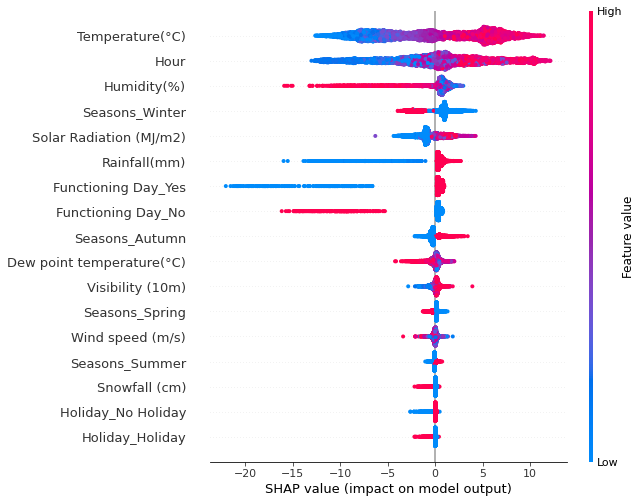

In [ ]:
shap.summary_plot(shap_values_train,X_train,plot_type='dot')

In [ ]:
explainer_test = shap.TreeExplainer(rf_model)
shap_values_test = explainer_test.shap_values(X_test)

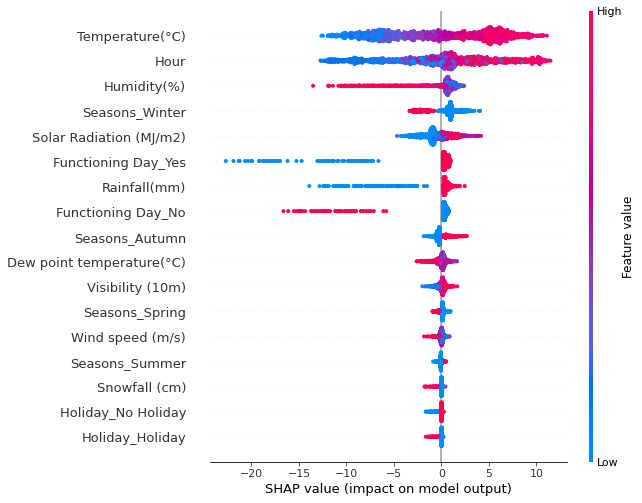

In [ ]:
shap.summary_plot(shap_values_test,X_test,plot_type='dot')

In [ ]:
bsdp_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   float64
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons_Autumn             8760 non-null   uint8  
 12  Seasons_Spring             8760 non-null   uint8  
 13  Seasons_Summer             8760 non-null   uint8

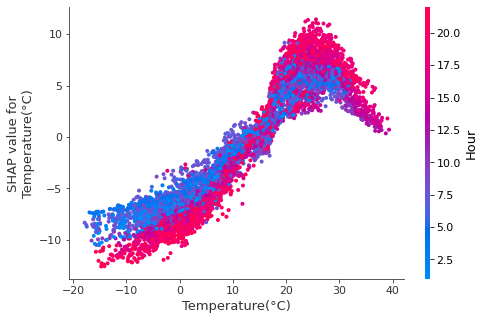

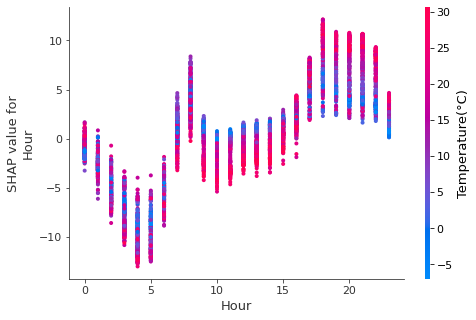

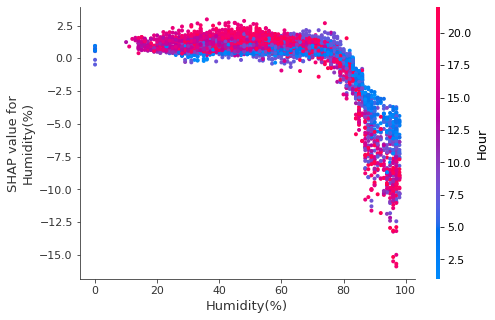

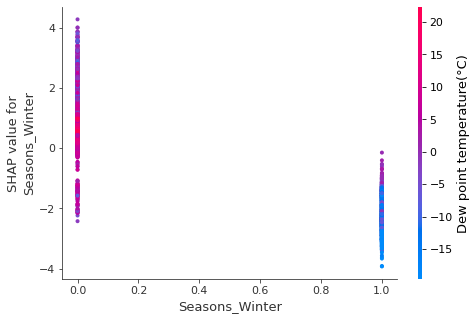

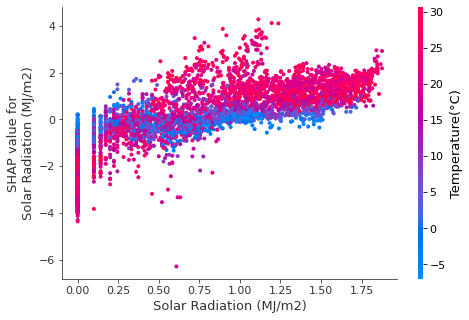

In [ ]:
top_vars = ['Temperature(°C)', 'Hour', 'Humidity(%)', 'Seasons_Winter','Solar Radiation (MJ/m2)']
for elem in top_vars:
  shap.dependence_plot(elem, shap_values_train, X_train)

## **XGBoost Model:**

---

In [ ]:
explainer_train1 = shap.TreeExplainer(xgb_model)
shap_values_train = explainer_train1.shap_values(X_train)

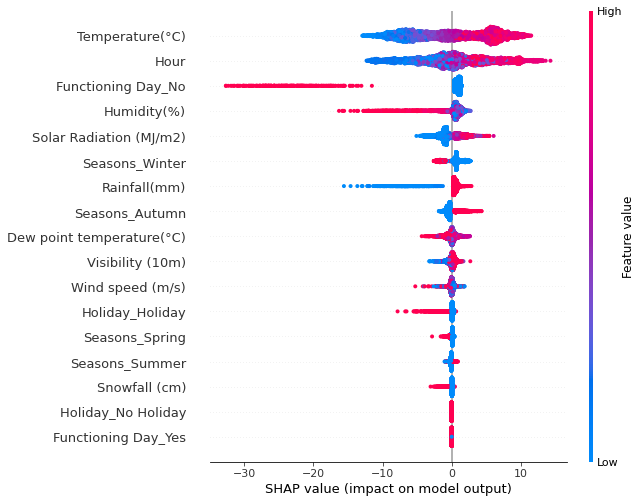

In [ ]:
shap.summary_plot(shap_values_train,X_train,plot_type='dot')

In [ ]:
explainer_test1 = shap.TreeExplainer(xgb_model)
shap_values_test = explainer_test1.shap_values(X_test)

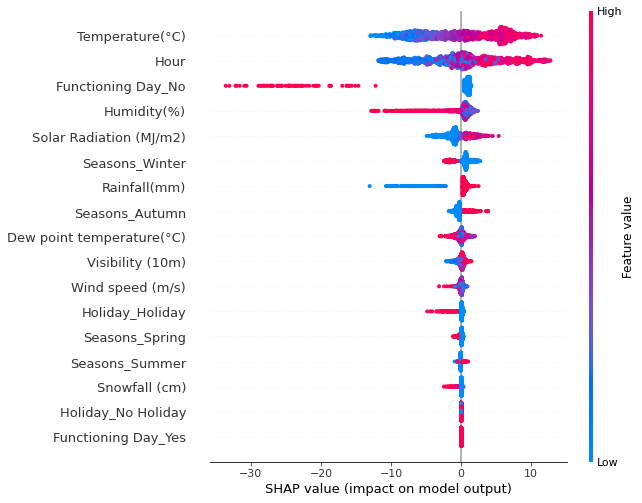

In [ ]:
shap.summary_plot(shap_values_test,X_test,plot_type='dot')

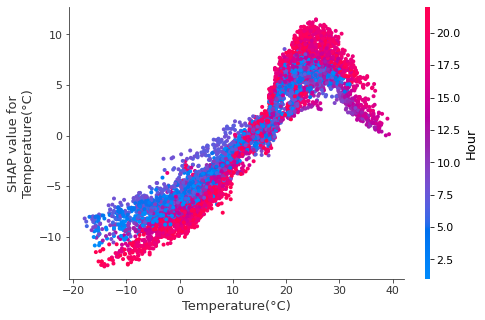

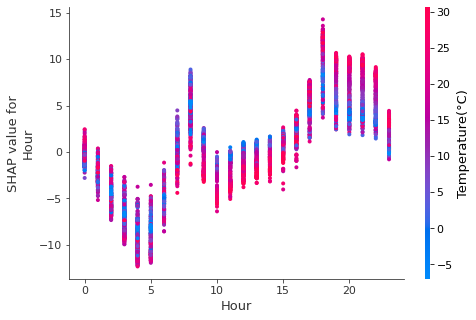

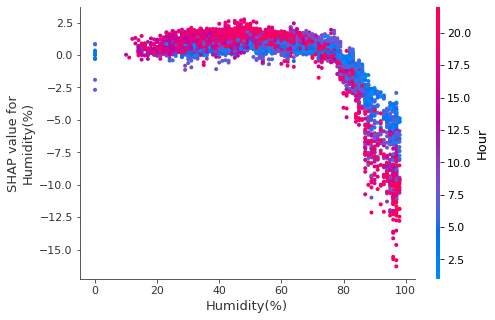

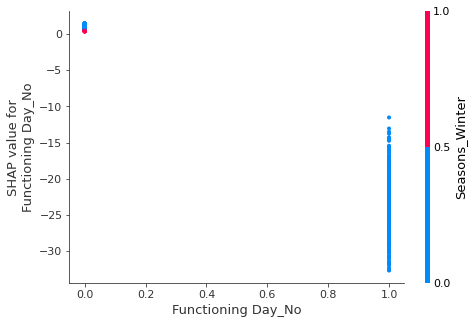

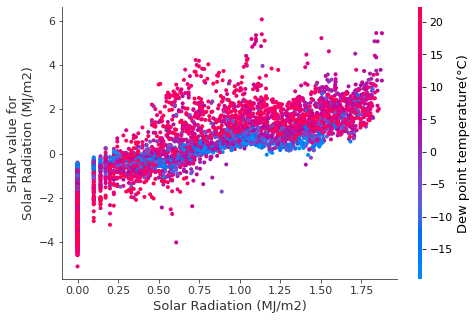

In [ ]:
top_vars = ['Temperature(°C)', 'Hour', 'Humidity(%)', 'Functioning Day_No','Solar Radiation (MJ/m2)']
for elem in top_vars:
  shap.dependence_plot(elem, shap_values_train, X_train)

In [ ]:
shap.initjs()
shap.force_plot(explainer_train1.expected_value, shap_values_train[:,0], X_train.iloc[:,0])

## **Gradient Boosting Machine:** 

---

In [ ]:
explainer_train2 = shap.TreeExplainer(gbm_model)
shap_values_train = explainer_train2.shap_values(X_train)

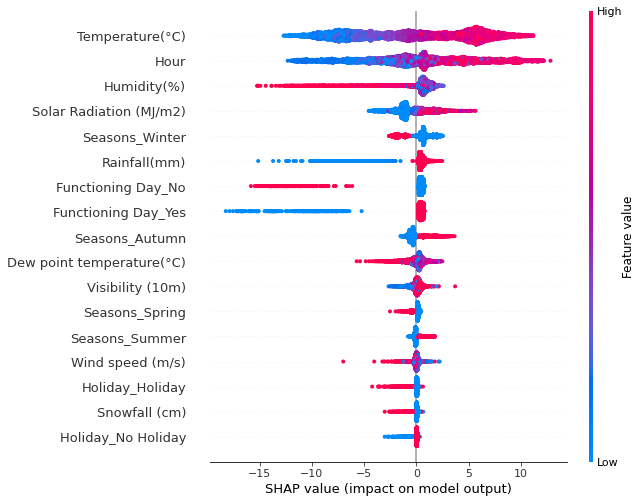

In [ ]:
shap.summary_plot(shap_values_train,X_train,plot_type='dot')

In [ ]:
explainer_test2 = shap.TreeExplainer(gbm_model)
shap_values_test = explainer_test2.shap_values(X_test)

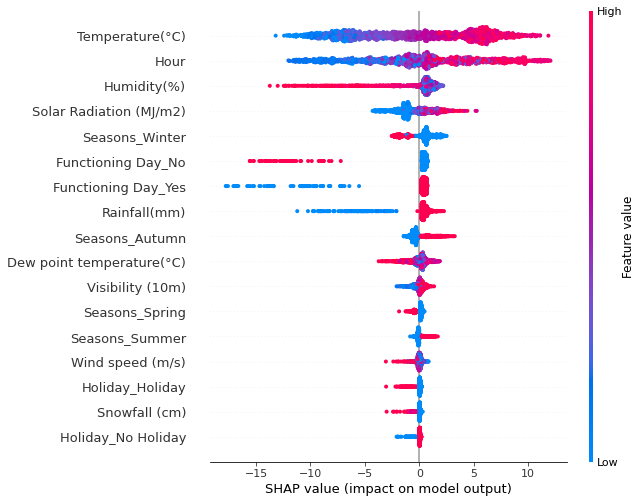

In [ ]:
shap.summary_plot(shap_values_test,X_test,plot_type='dot')

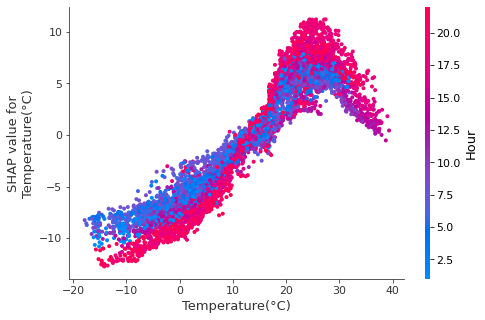

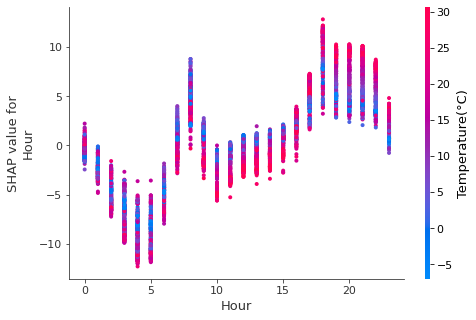

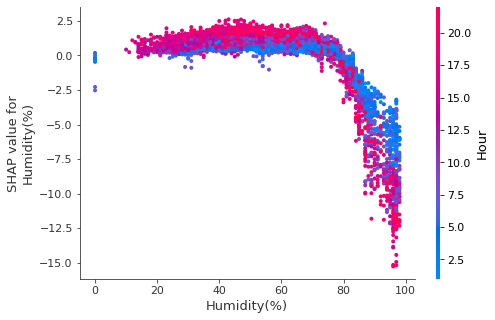

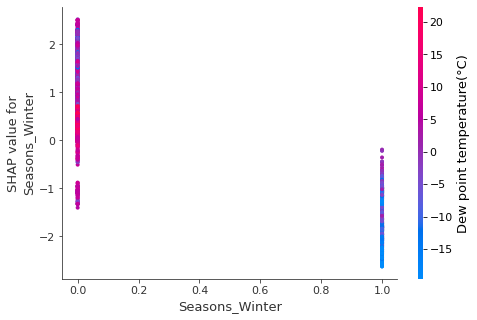

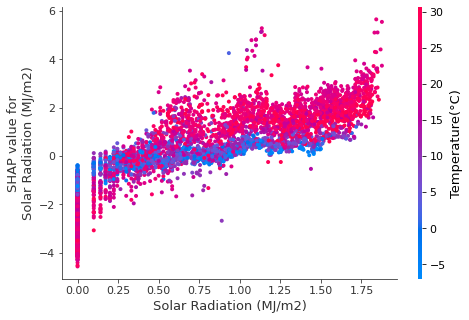

In [ ]:
top_vars = ['Temperature(°C)', 'Hour', 'Humidity(%)', 'Seasons_Winter','Solar Radiation (MJ/m2)']
for elem in top_vars:
  shap.dependence_plot(elem, shap_values_train, X_train)